# Absolute Calibration

## Packages

# Jupiter Period Estimation


## Packages

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import spectralpy as spc
from astropy import units as u
import astropy.constants as const

## Constants

In [104]:
## Constants 
BALMER = 6562.79                        #: H_alpha data from NIST
ERRBAL = 0.03                           #: its uncertainty
R = 71492 * u.km                        #: equat. radius of Jupiter from https://ssd.jpl.nasa.gov/horizons/app.html#/
DR = 4 * u.km                           #: its uncertainty
C = const.c.to(u.m/u.s)                 #: light velocity
PERIOD = (9+55/60+29.711/3600) * u.h    #: Sid. rot. period (III) of Jupiter from https://ssd.jpl.nasa.gov/horizons/app.html#/

## Open Data

Filename: /home/bernardo/Scrivania/FISICA/ASTROFISICA/Astr_Oss/Progetti/proj_3/data_files/18-04-22/giove/giove_spec.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (1392, 1040)   int16 (rescales to uint16)   
NEWS [568 791 0 None] [624 735 21 None]
Start [624 735 21 None]
N = 1040
K = 1
[624 735 21 None]
Start [624 735 21 None]
N = 1392
K = 3
[624 735 21 1392]
Start [568 791 0 None]
N = 1040
K = 1
[568 791 0 None]
Start [568 791 0 None]
N = 1392
K = 3
[568 791 0 1392]
 - HEADER -
SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1392 /fastest changing axis                           
NAXIS2  =                 1040 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO +

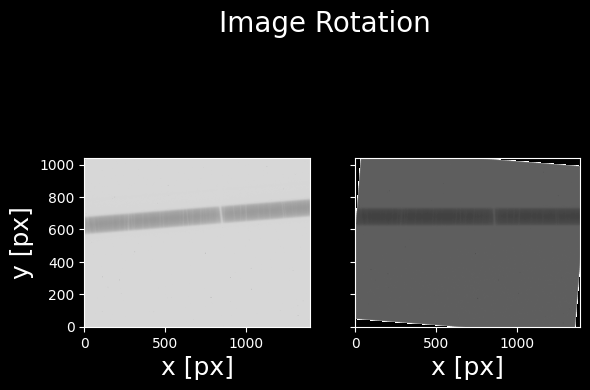

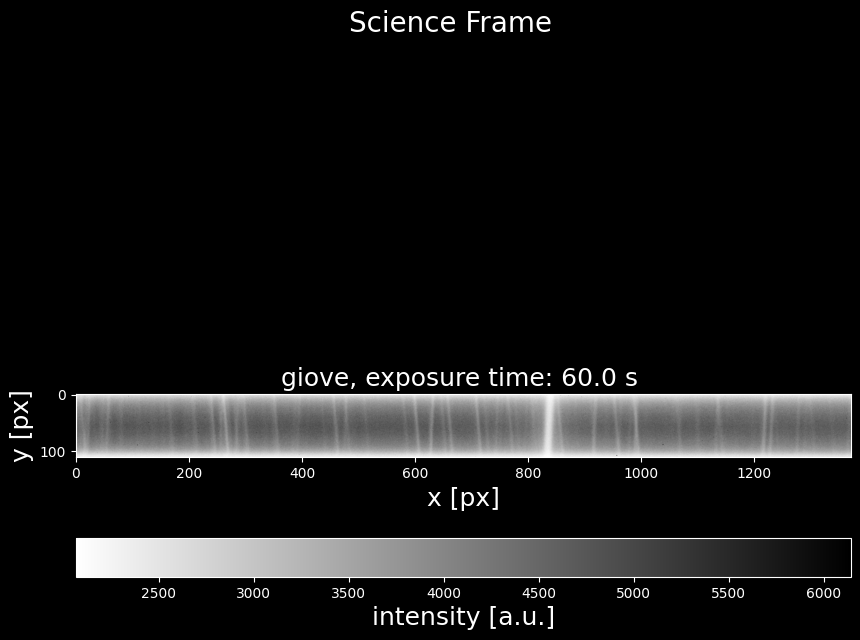

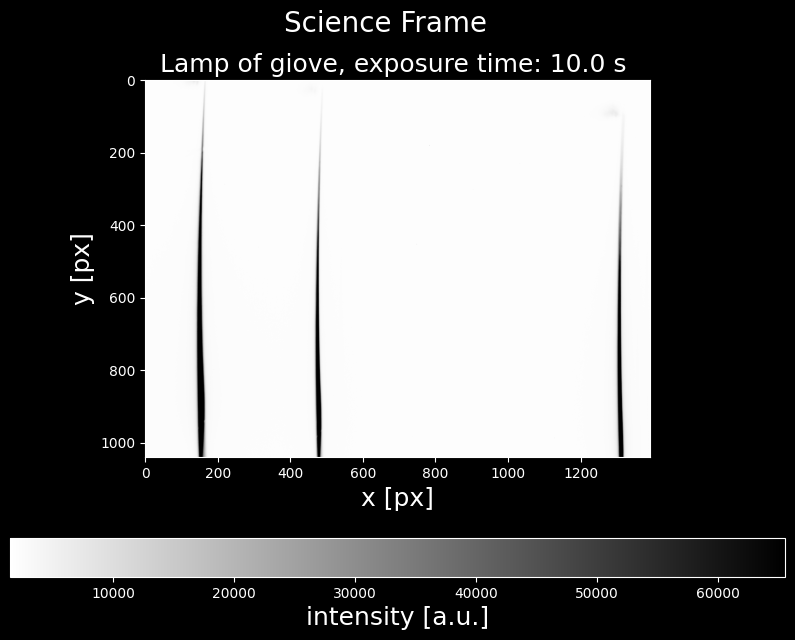

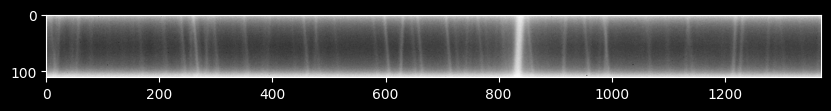

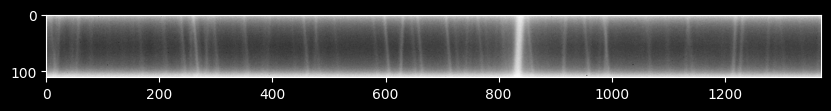

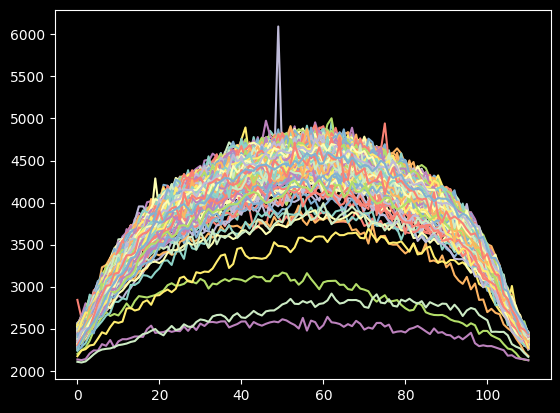

In [105]:
OBS_NIGHT = '18-04-22'
TARGET_NAME = 'giove'    
SELECTION = 0
fit_args = { 'mode': 'odr' }                #: parameters for the fit
lim_width = [[0,1391],[[0,112],[108,221]]]  #: coordinates of the ends of the spectrum
lag = 15                                    #: step length to collect xdata
# open and extract the fit file 
jupiter, lamp = spc.get_target_data(OBS_NIGHT,TARGET_NAME,SELECTION,angle=None,lim_width=lim_width,lag=lag,gauss_corr=False,lamp_incl=False, fit_args=fit_args, diagn_plots=False,norm='log',aspect='equal')


plt.figure(figsize=(10,7))
plt.imshow(jupiter.data,cmap='gray_r',norm='log')
# from scipy.signal import medfilt2d
# data = medfilt2d(jupiter.data.copy())
data = jupiter.data.copy()
plt.figure(figsize=(10,7))
plt.imshow(data,cmap='gray_r',norm='log')
plt.show()

plt.figure()
for i in range(data.shape[1])[::5]:
    plt.plot(data[:,i])
plt.show()


## Inclination Correction

Take a column every `step` pixels, for each one fit a parabola, find the vertecies and fit a line to find the inclination angle


curve_fit
XERR [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Fit results:
	mode : curve_fit
	par_2: -5.40e-01 +/- 1.4e-02  -->  2.62 %	init : -0.2
	par_1: 6.23e+01 +/- 1.6e+00  -->  2.64 %	init : 1.0
	par_0: 2.390e+03 +/- 5.0e+01  -->  2.08 %	init : 1.0
	corr_par_2-par_1	 = -0.95
	corr_par_2-par_0	 = 0.8
	corr_par_1-par_0	 = -0.94
[[ 2.00356221e-04 -2.21223034e-02  5.59146881e-01]
 [-2.21223034e-02  2.69935833e+00 -7.64239390e+01]
 [ 5.59146881e-01 -7.64239390e+01  2.46551371e+03]]
curve_fit
XERR [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Fit results:
	mode : curve_fit
	par_2: -5.35e-01 +/- 1.7e-02  -->  3.09 %	init : -0.2
	par

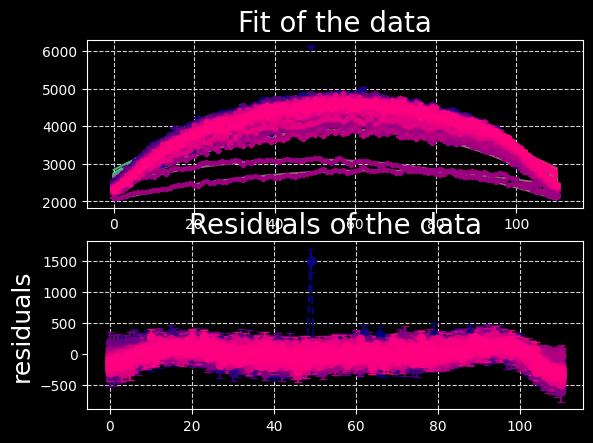

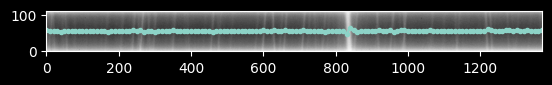

curve_fit
XERR None

Fit results:
	mode : curve_fit
	m: 1.45e-03 +/- 2.3e-04  -->  15.98 %	init : 0.0
	q: 5.478e+01 +/- 1.9e-01  -->  0.34 %	init : 5.6e+01
	corr_m-q	 = -0.87
[[ 5.35459129e-08 -3.73233081e-05]
 [-3.73233081e-05  3.46787977e-02]]


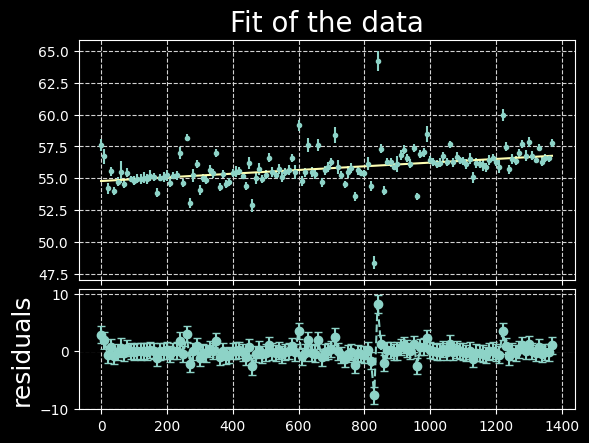

Angle2 = 8.3e-02 +/- 1.3e-02 deg ---> 15.98%
Angle_tot = 4.52e+00 +/- 4.0e-01 deg ---> 8.89%


In [106]:
## Parabola Fits
step = 10
N = data.shape[1]                   #: image horizontal size
col = np.arange(N)[::step]          #: selected columns
v  = []                             #: vertex coordinates of the parabolas for each column
Dv = []                             #: their uncertainties
xdata = np.arange(data.shape[0])
fig, ax = plt.subplots(2,1)
for i in col:
    ydata = data[:,i]
    # fit a parabola
    fit = spc.FuncFit(xdata=xdata,ydata=ydata,xerr=1)
    fit.pol_fit(2,[-0.2,1,1],mode='curve_fit')
    # extract the parameters and the covariances
    a,b,c = fit.fit_par
    cov = fit.res['cov']
    delta = b**2 - 4*a*c
    # compute the uncertainty related with the estimated vertex value
    der = [ b/(2*a**2),
            -1/(2*a) ]
    err = np.sqrt(np.sum([der[j]*der[k]*cov[j,k] for k in range(len(der)) for j in range(len(der))]))
    # store the results
    v  += [-b/2/a]
    Dv += [err]
    # plot
    color1 = (i/N,0,0.5)
    color2 = (i/N,1-i/N,0.5)
    fit.data_plot(ax[0],pltarg1={'color':color1},pltarg2={'color':color2})
    fit.residuals_plot(ax[1],color=color1)
plt.figure()
plt.imshow(data,origin='lower',norm='log',cmap='gray_r')
plt.errorbar(col,v,Dv,fmt='.-')
plt.show()

## Linear Fit
fit = spc.FuncFit(xdata=col,ydata=v,yerr=Dv)
fit.linear_fit([0,np.mean(v)],mode='curve_fit')
fit.plot(mode='subplots')
plt.show()
m  = fit.fit_par[0]
Dm = fit.fit_err[0]

# compute the inclination angle
angle  = np.arctan(m) * 180/np.pi
Dangle = Dm/(1+m**2)  * 180/np.pi
# print the value with the correct digits
spc.print_measure(angle,Dangle,'Angle2','deg')

# compute the total inclination angle
angle  = jupiter.angle[0] + angle
Dangle = np.sqrt(jupiter.angle[1]**2 + Dangle**2)
spc.print_measure(angle,Dangle,'Angle_tot','deg')
# rotate the image
jupiter.data = jupiter.hdul[0].data.copy()
jupiter = jupiter.rotate_target(angle)


## Period Estimation

$$ T = 8\pi \frac{R_J}{c} \frac{\lambda}{\Delta\lambda} \frac{x}{R_{px}} $$

curve_fit
XERR [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Fit results:
	mode : curve_fit
	k: 4.268e+03 +/- 1.0e+01  -->  0.24 %	init : 4.5e+03
	mu: 5.462e+01 +/- 6.0e-01  -->  1.10 %	init : 5.2e+01
	sigma: 6.05e+01 +/- 1.1e+00  -->  1.81 %	init : 2.0
	corr_k-mu	 = -0.034
	corr_k-sigma	 = -0.39
	corr_mu-sigma	 = 0.15
curve_fit
XERR [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Fit results:
	mode : curve_fit
	k: 4.6754e+03 +/- 9.2e+00  -->  0.20 %	init : 4.8e+03
	mu: 5.479e+01 +/- 4.5e-01  -->  0.83 %	init : 5.2e+01
	sigma: 5.564e+01 +/- 7.6e-01  -->  1.36 %	init : 2.0
	corr_k-mu	 = -0.033
	corr_k-sigma	 = -0.36
	corr_mu-sigma	 = 0.15
curve_fit
XERR [1 1 1 

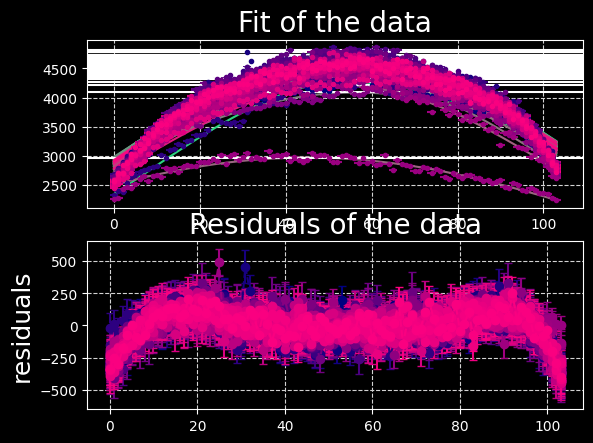

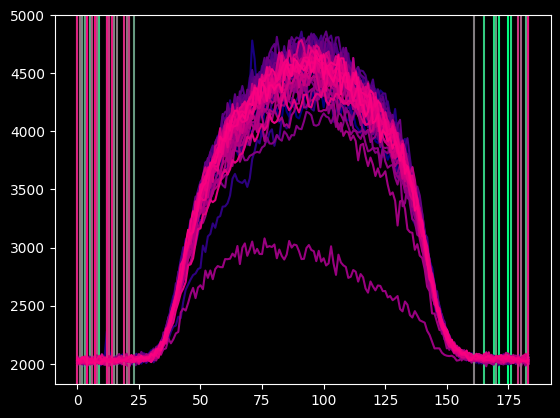

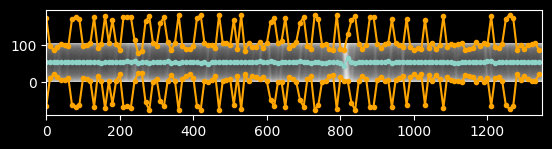

Centre = 5.441e+01 +/- 1.5e-01 pxs ---> 0.28%
Radius = 6.69e+01 +/- 3.1e+00 pxs ---> 4.59%


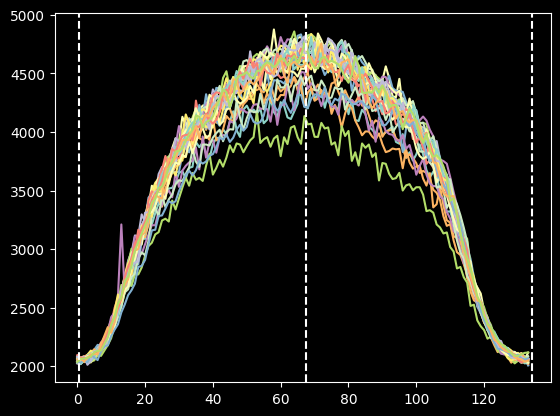

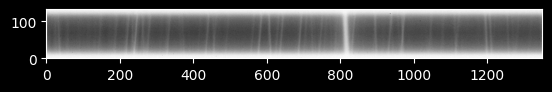

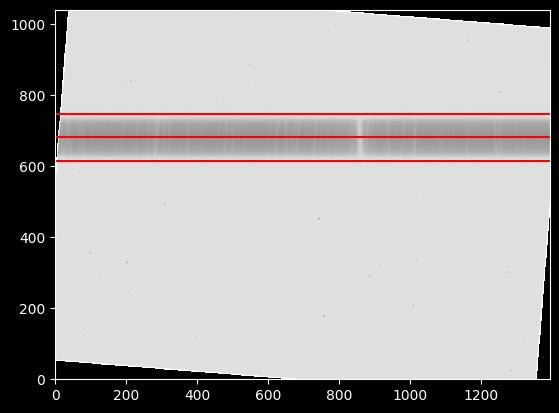

In [107]:
# store data before slicing
uncut_data = jupiter.data.copy()
cp_jup = jupiter.copy()
# ends of the slice
cp_jup.lims = [626,730,42,1391]
cp_jup.cut_image()
data = cp_jup.data.copy()

## Gaussian Fit 
step = 10
N = data.shape[1]                   #: image horizontal size
col = np.arange(N)[::step]          #: selected columns
c  = []                             #: coordinates of the centre for each column
Dc = []                             #: their uncertainties
r  = []                             #: radius estimations for each column
Dr = []                             #: their uncertainties
xdata = np.arange(data.shape[0])
# extend the ends of the sliced data 
ext_data = uncut_data[cp_jup.lims[0]-40 : cp_jup.lims[1]+40, cp_jup.lims[2]:].copy()
fig, ax = plt.subplots(2,1)
fig0, ax0 = plt.subplots(1,1)
for i in col:
    ydata = data[:,i]
    # fit a Gaussian
    fit = spc.FuncFit(xdata=xdata,ydata=ydata,xerr=1)
    fit.gaussian_fit([ydata.max(),xdata.mean(),2],mode='curve_fit')
    # extract the estimated paramters
    k,mu = fit.fit_par[:2]
    Dk,Dmu = fit.fit_err[:2]
    # store the center value
    c  += [mu]
    Dc += [Dmu]
    # find the distance at the 10%
    k10 = k / 10
    pos = np.argmin(abs(ext_data[:,i]-k10))
    # store the radius estimation
    r  += [abs(mu-pos)]
    Dr += [np.sqrt(Dmu**2 + 0.5**2)]
    # plot
    if i % 3 == 0:
        color1 = (i/N,0,0.5)
        color2 = (i/N,1-i/N,0.5)
        fit.data_plot(ax[0],pltarg1={'color':color1},pltarg2={'color':color2})
        fit.residuals_plot(ax[1],color=color1)
        ax[0].axhline(k,0,1)
        ax0.plot(ext_data[:,i],color=color1)
        ax0.axvline(pos,0,1,color=color2)
plt.figure()
plt.imshow(data,origin='lower',norm='log',cmap='gray_r')
plt.errorbar(col,c,Dc,fmt='.-')
plt.errorbar(col,np.array(c)+np.array(r),Dr,fmt='.-',color='orange')
plt.errorbar(col,np.array(c)-np.array(r),Dr,fmt='.-',color='orange')
plt.show()

# compute the mean and the STD
cen, Dcen = spc.mean_n_std(c)
rad, Drad = spc.mean_n_std(r) 
# rad = 76
# rad = 48
spc.print_measure(cen,Dcen,'Centre','pxs')
spc.print_measure(rad,Drad,'Radius','pxs')


## Slicing
# store the value of the 0 point
lim0 = cp_jup.lims[0] 
# compute the values in the coordinates of the full image
cen += lim0
top = cen + rad     #: top end of the planet in px 
low = cen - rad     #: bottom end of the planet in px 
# slice the data to the angular size of the planet
cp_jup.data = uncut_data.copy()
cp_jup.lims = [np.floor(low).astype(int),np.floor(top).astype(int),42,1391]
cp_jup.cut_image()
data = cp_jup.data.copy()

plt.figure()
for i in range(data.shape[1])[::50]:
    plt.plot(data[:,i])
plt.axvline(cen-cp_jup.lims[0],0,1,linestyle='--')
plt.axvline(top-cp_jup.lims[0],0,1,linestyle='--')
plt.axvline(low-cp_jup.lims[0],0,1,linestyle='--')
plt.show()

plt.figure()
plt.imshow(cp_jup.data,origin='lower',norm='log',cmap='gray_r')
plt.figure()
plt.imshow(uncut_data,origin='lower',norm='log',cmap='gray_r')
plt.axhline(cen,0,1,color='red')
plt.axhline(top,0,1,color='red')
plt.axhline(low,0,1,color='red')
plt.show()

## Lines Selection
# compute the position of the centre
mid = cen - cp_jup.lims[0]
Dmid = np.sqrt((2*Dcen)**2 + Drad**2)


### Select height

heights 10 124 (134, 1349)


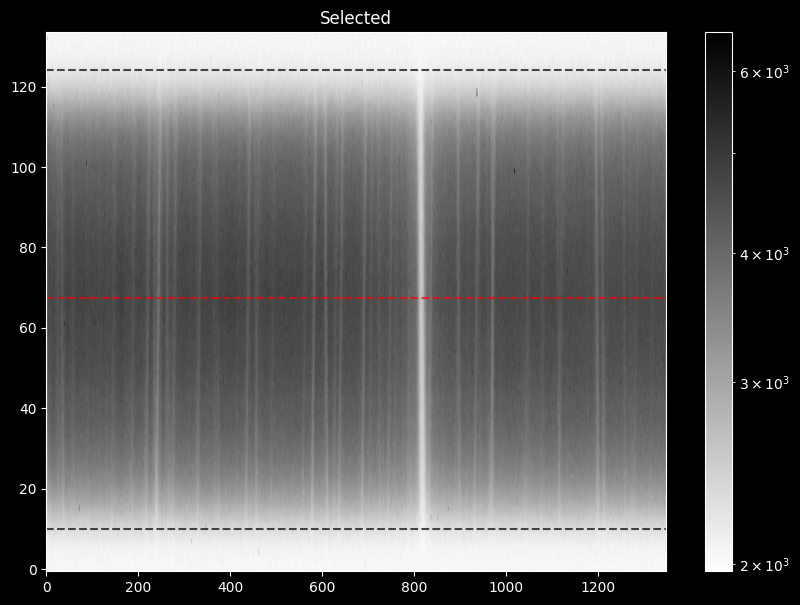

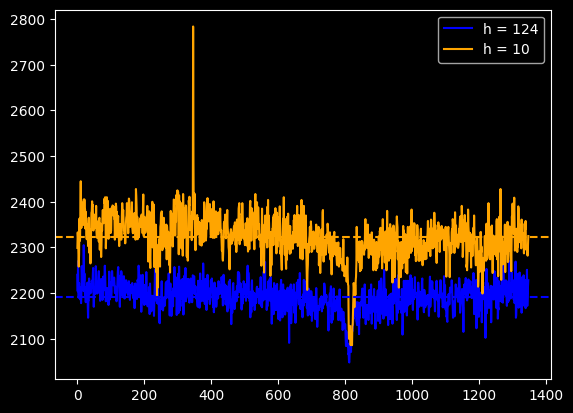

(1349,)


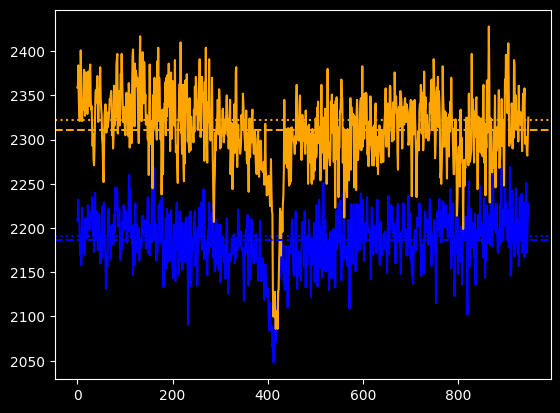

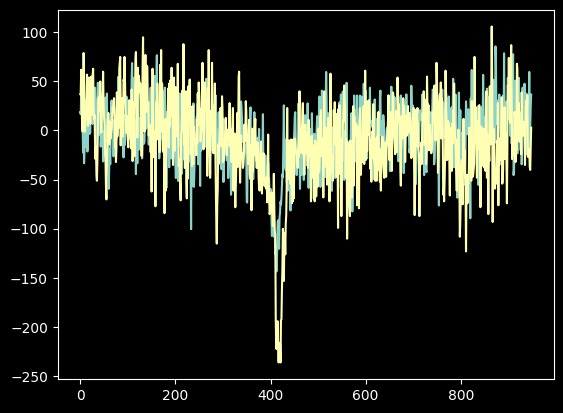

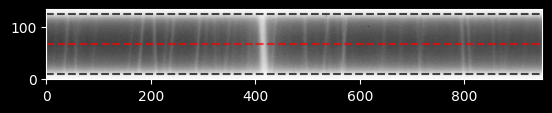

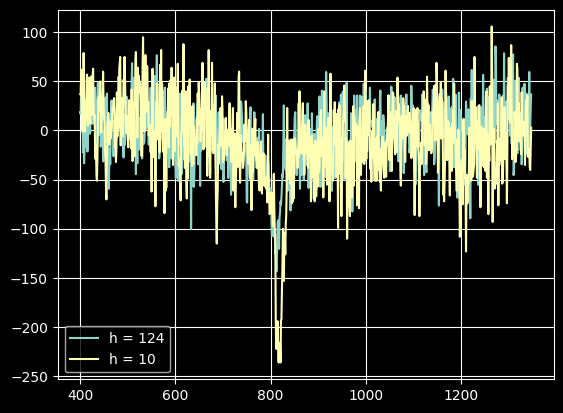

Left Shift -10
Right Shift 0
[-948  948]


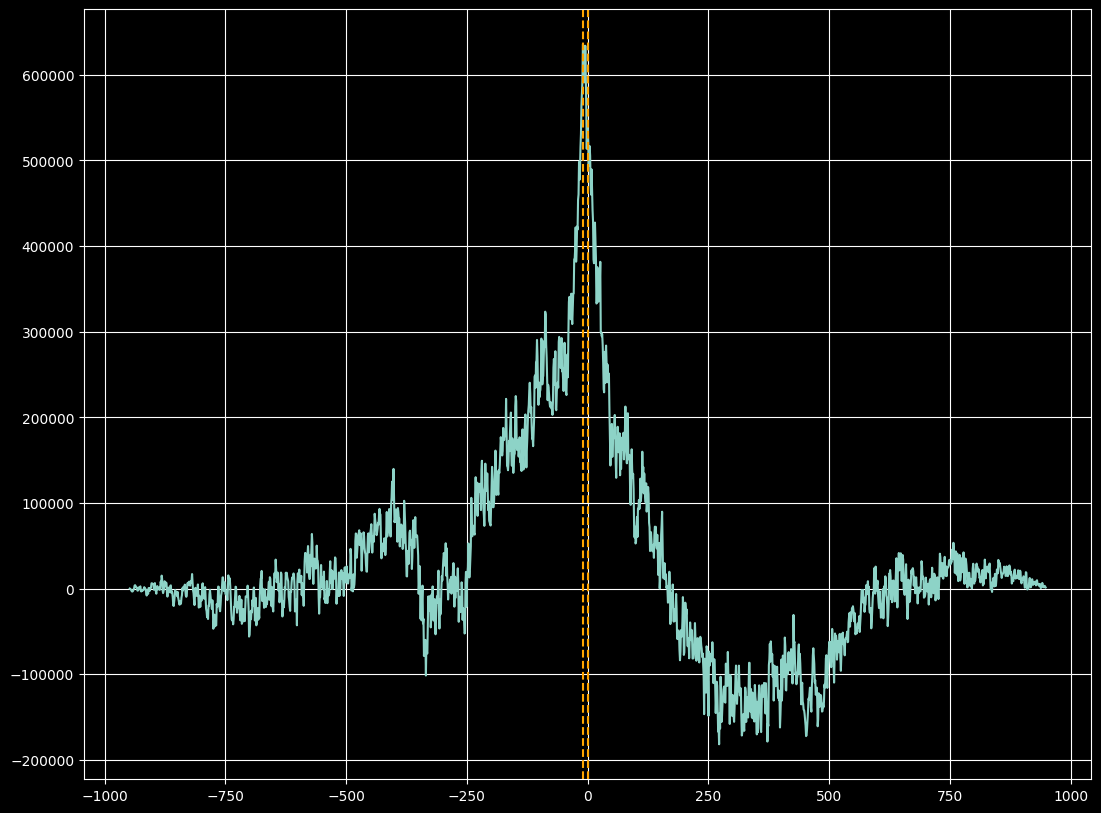

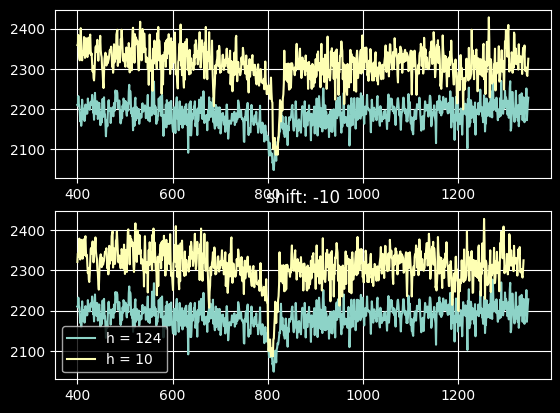

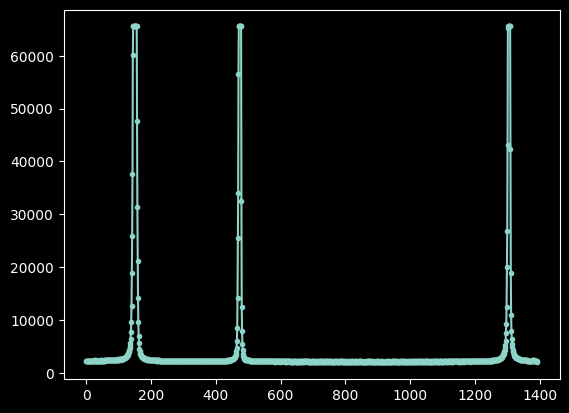

odr

Fit results:
	mode : odr
	m: 7.986e-02 +/- 4.0e-04  -->  0.51 %	init : 0.08
	q: 6.49479e+03 +/- 3.7e-01  -->  0.01 %	init : 0.0
	corr_m-q	 = -0.85
[[ 1.6278983e-07 -1.2773595e-04]
 [-1.2773595e-04  1.3812510e-01]]


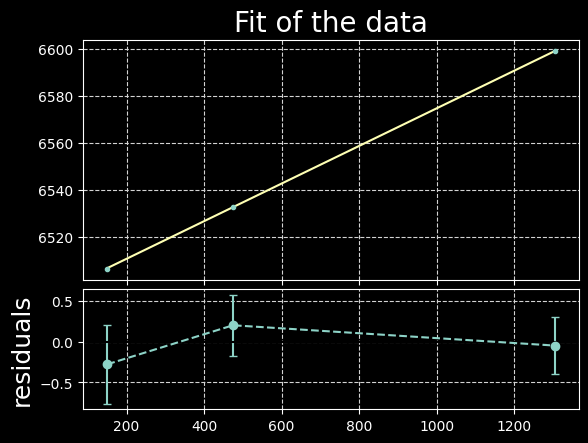


Shift1 : -10
13.681973375349008 h
Dl1 = 7.9857e-01 +/- 3.2e-04 AA ---> 0.04%
T1 = 1.175e+01 +/- 8.3e-01 h ---> 7.06%
omega1 = 1.49e-04 +/- 1.0e-05 1 / s ---> 7.06%
v_tan1 = 1.062e+01 +/- 7.5e-01 km / s ---> 7.06%
period = 9.92491972222222 h --> NO
diff = 2.2 sigma


In [ ]:

# select two rows
bottom = 10
up = np.floor(2*mid - bottom).astype(int)
print('heights',bottom,up,data.shape) 
# compute the distance from the central row
h = mid - bottom
Dh = Dmid
if bottom > len(data): print('Oh no'); exit()

# average over 3 pixels
j1 = data[up]
j2 = data[bottom]
# j1 = np.mean(data[up-1:up+2],axis=0)
# j2 = np.mean(data[bottom-1:bottom+2],axis=0)

plt.figure(figsize=(10,7))
plt.title('Selected')
plt.imshow(data,cmap='gray_r',norm='log',origin='lower',aspect='auto')
plt.axhline(up,0,1,linestyle='dashed',color='black',alpha=0.7)
plt.axhline(mid,0,1,linestyle='dashed',color='red',alpha=0.7)
plt.axhline(bottom,0,1,linestyle='dashed',color='black',alpha=0.7)
plt.colorbar()
plt.figure()
plt.plot(j1,'-',label=f'h = {up}',color='b')
plt.plot(j2,'-',label=f'h = {bottom}',color='orange')
plt.axhline(j1.mean(),0,1,linestyle='dashed',color='b')
plt.axhline(j2.mean(),0,1,linestyle='dashed',color='orange')
plt.legend()
plt.show()

# select an interval
start, stop = 400, None
# start, stop = 790, 850
# check the ends
if stop is None:
    px_val = np.arange(start,data.shape[1])
elif stop > 0:
    px_val = np.arange(start,stop)
else:
    px_val = np.arange(start,data.shape[1]+stop)

print(j1.shape)

# store the data
j1_p = j1[slice(start,stop)].copy()
j2_p = j2[slice(start,stop)].copy()
# j2_p = data[int(mid)]
# remove the average
# j1 = j1_p - data.mean(axis=0)[slice(start,stop)]
# j2 = j2_p - data.mean(axis=0)[slice(start,stop)]
# j1 = j1_p - np.full(j1_p.shape,4000)
# j2 = j2_p - np.full(j1_p.shape,4000)
plt.figure()    
plt.axhline(j1.mean(),0,1,linestyle='dotted',color='b')
plt.axhline(j2.mean(),0,1,linestyle='dotted',color='orange')
j1 = j1_p - j1.mean()
j2 = j2_p - j2.mean()
# j1 = j1_p - np.full(j1_p.shape,4000)
# j2 = j2_p - np.full(j1_p.shape,4000)
# j1 = j1_p - data[int(mid)-1:int(mid)+2,slice(start,stop)].mean(axis=0)
# j2 = j2_p - data[int(mid)-1:int(mid)+2,slice(start,stop)].mean(axis=0)
plt.plot(j1_p,'-',label=f'h = {up}',color='b')
plt.plot(j2_p,'-',label=f'h = {bottom}',color='orange')
plt.axhline(j1_p.mean(),0,1,linestyle='dashed',color='b')
plt.axhline(j2_p.mean(),0,1,linestyle='dashed',color='orange')
plt.show()
plt.figure()
plt.plot(j1)
plt.plot(j2)
plt.show()
# j1 = j1_p - j1_p.mean()
# j2 = j2_p - j2_p.mean()

plt.figure()
plt.imshow(data[:,slice(start,stop)],cmap='gray_r',norm='log',origin='lower')
plt.axhline(up,0,1,linestyle='dashed',color='black',alpha=0.7)
plt.axhline(mid,0,1,linestyle='dashed',color='red',alpha=0.7)
plt.axhline(bottom,0,1,linestyle='dashed',color='black',alpha=0.7)
plt.figure()
plt.plot(px_val,j1,'-',label=f'h = {up}')
plt.plot(px_val,j2,'-',label=f'h = {bottom}')
plt.grid()
plt.legend()
plt.show()

## Doppler Shift
from scipy.signal import correlate,correlation_lags
corr = correlate(j1,j2,mode='full')
lags = correlation_lags(len(j1),len(j2))
n_corr = np.where(lags <= 0, corr, 0)       #: correlation for negative lags only
p_corr = np.where(lags >= 0, corr, 0)       #: correlation for positive lags only
shift1 = lags[n_corr.argmax()]              #: left shift
shift2 = lags[p_corr.argmax()]              #: right shift
print('Left Shift' ,shift1)
print('Right Shift',shift2)
print(lags[[0,-1]])
plt.figure(figsize=(13,10))
plt.plot(lags,corr)
plt.axvline(shift1,0,1,color='orange',linestyle='--')
plt.axvline(shift2,0,1,color='orange',linestyle='--')
plt.grid()
plt.show()

j1 = j1_p.copy()
j2 = j2_p.copy()

plt.figure()
plt.subplot(2,1,1)
plt.plot(px_val,j1)
plt.plot(px_val,j2)
plt.grid()
if shift1 != 0:
    plt.subplot(2,1,2)
    plt.title(f'shift: {shift1}')
    plt.plot(px_val,j1,label=f'h = {up}')
    plt.plot(px_val[:shift1],j2[-shift1:],label=f'h = {bottom}')
    plt.grid()
    plt.legend()
plt.show()

## Wavelength Calibration
# average over 4 rows
heights = np.array([710+i*1 for i in range(4)])
lamp.spec, lamp.std = spc.mean_n_std(lamp.data[heights],axis=0)
plt.figure()
plt.errorbar(np.arange(*lamp.spec.shape),lamp.spec,lamp.std,fmt='.-')
plt.show()
# get data
lines, px, Dpx = spc.get_cal_lines(OBS_NIGHT,TARGET_NAME)
Dlines = lines/20000 / 2
# fit a line
m0 = np.mean(np.diff(lines)/np.diff(px))
fit = spc.FuncFit(xdata=px,xerr=Dpx,ydata=lines,yerr=Dlines)
fit.linear_fit([m0,0])
fit.plot(mode='subplots',points_num=3)
plt.show()
# store the parameter to convert px in AA
px_arm  = fit.fit_par[0]
Dpx_arm = fit.fit_err[0]

# px_arm = 0.115
## Period
def period(delta, index):
    print('\nShift'+index+' :',delta)
    delta  = px_arm * abs(delta)
    Ddelta = Dpx_arm * abs(delta)
    t0 = (8*np.pi * (R/C) * (BALMER/delta)).to(u.h)
    print(t0)
    t  = (8*np.pi * (R/C) * (BALMER/delta) * (h/rad)).to(u.h)
    Dt = t * np.sqrt( (DR/R)**2 + (ERRBAL/BALMER)**2 + (Ddelta/delta)**2 + (Drad/rad)**2 + (Dh/h)**2)
    w  = (2*np.pi / t).to(1 / u.s)
    Dw = w * Dt/t
    v  = (w*R).to(u.km/u.s)
    Dv = v * np.sqrt((Dw/w)**2 + (DR/R)**2)
    spc.print_measure(delta,Ddelta,'Dl'+str(index),'AA')
    spc.print_measure(t,Dt,'T'+str(index))
    spc.print_measure(w,Dw,'omega'+str(index))
    spc.print_measure(v,Dv,'v_tan'+str(index))
    acc_cond = t-Dt <= PERIOD <= t+Dt
    print(f'period = {PERIOD} -->', 'OK' if acc_cond else 'NO') 
    if not acc_cond:
        print(f'diff = {abs(PERIOD-t)/Dt:.2} sigma')
    return t, Dt
if shift1 != 0:
    p1 = period(shift1,'1')


In [112]:
old_mid = mid

48
15
-5


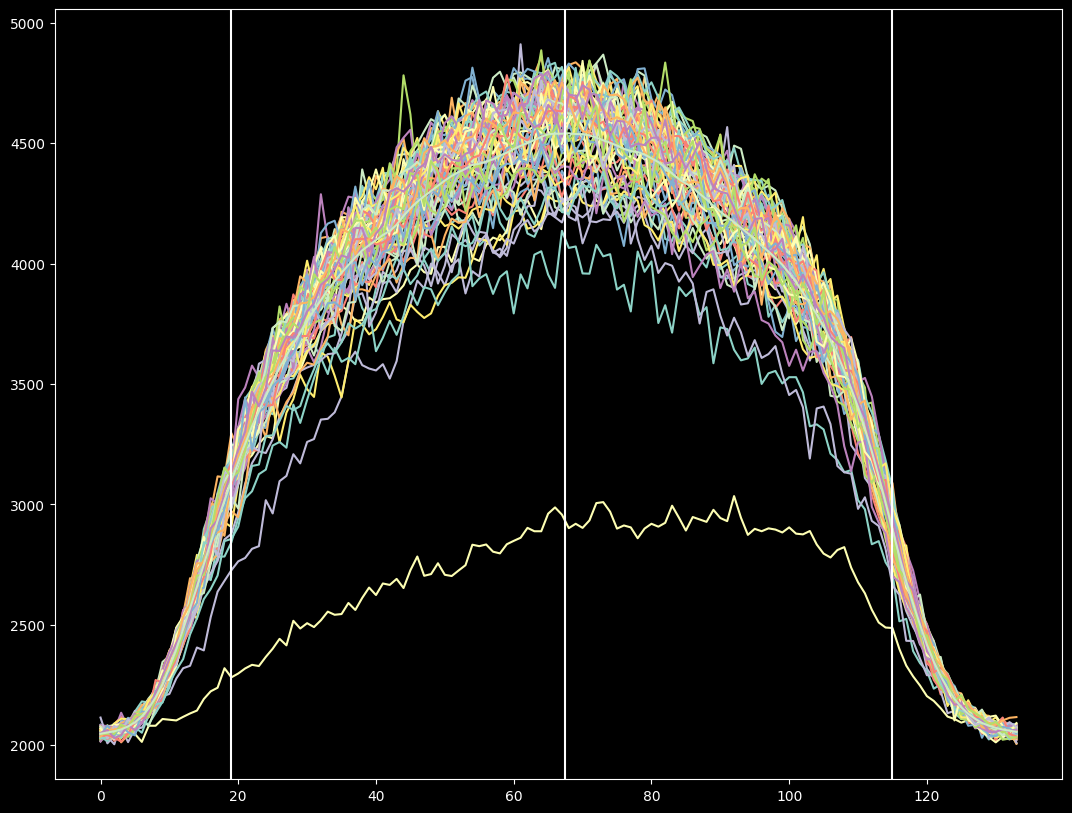

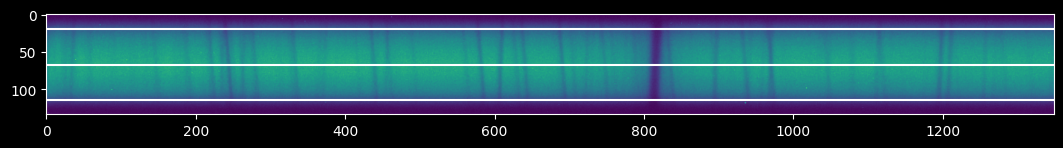

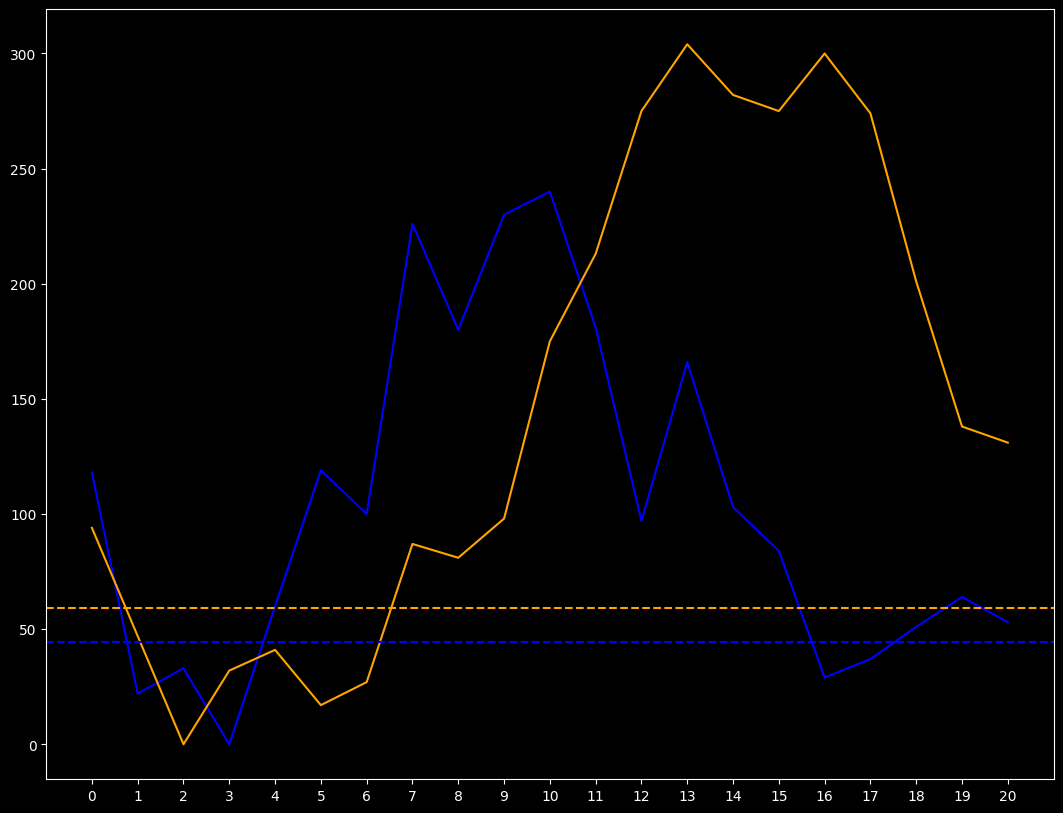

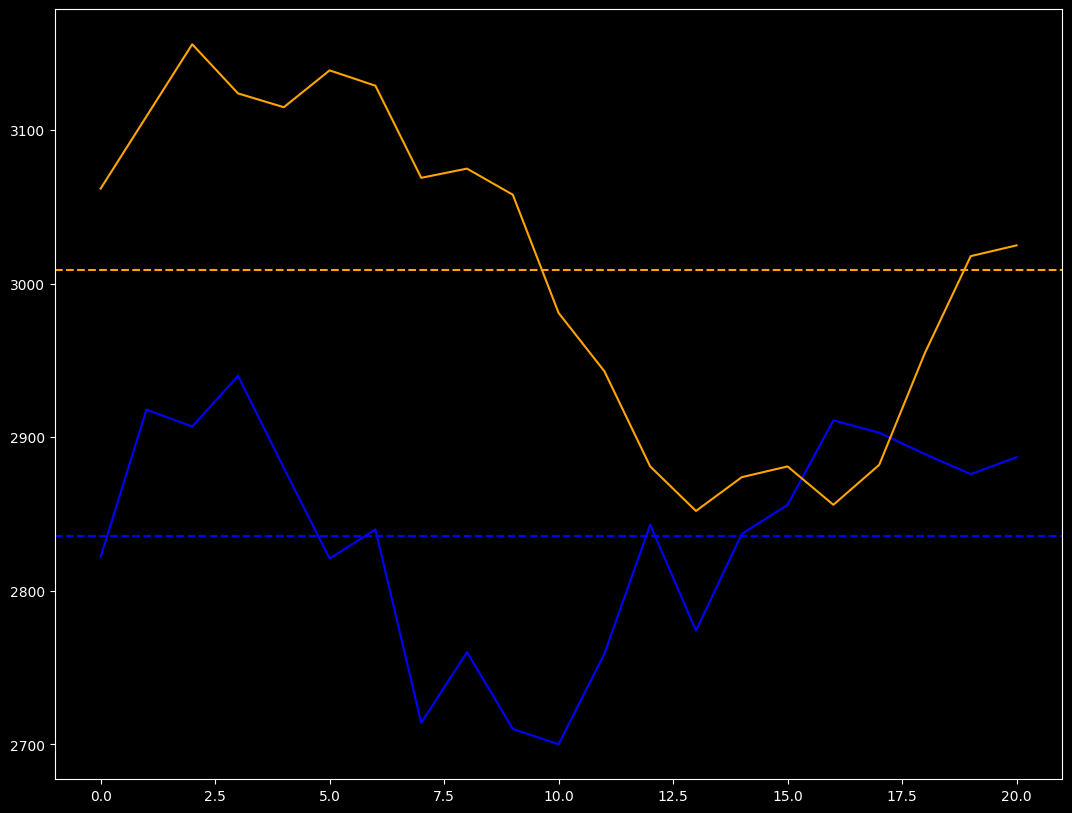

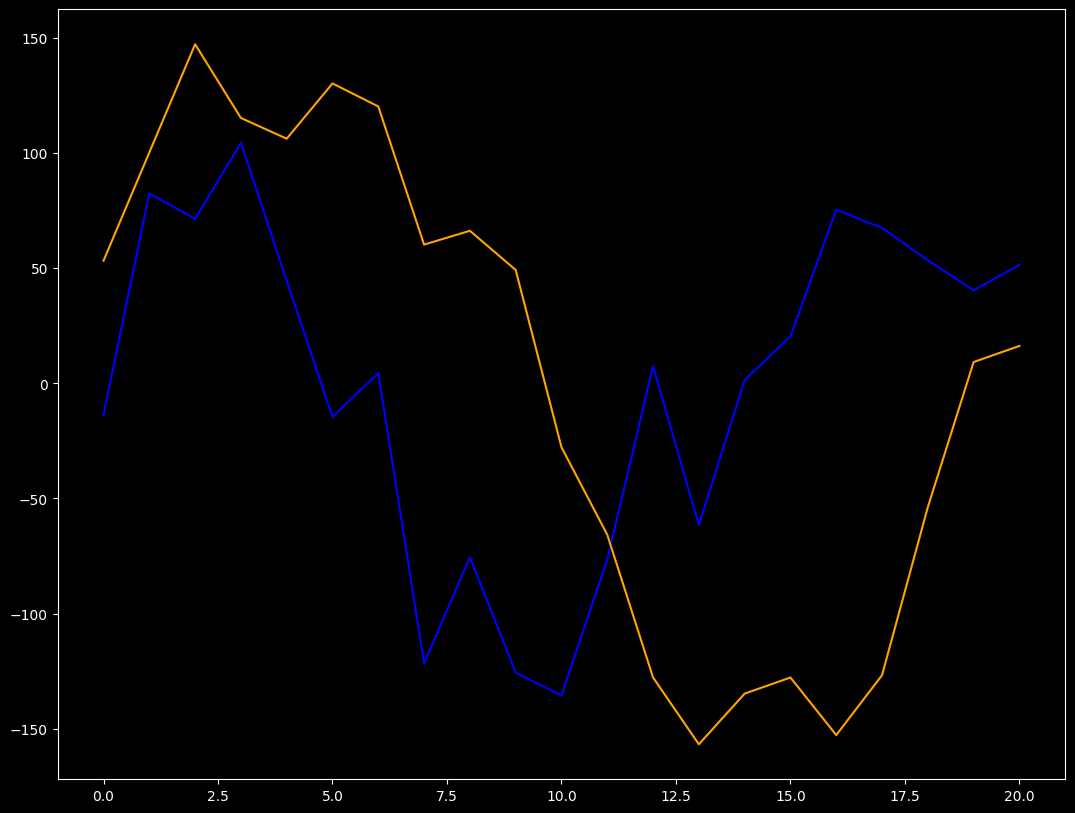

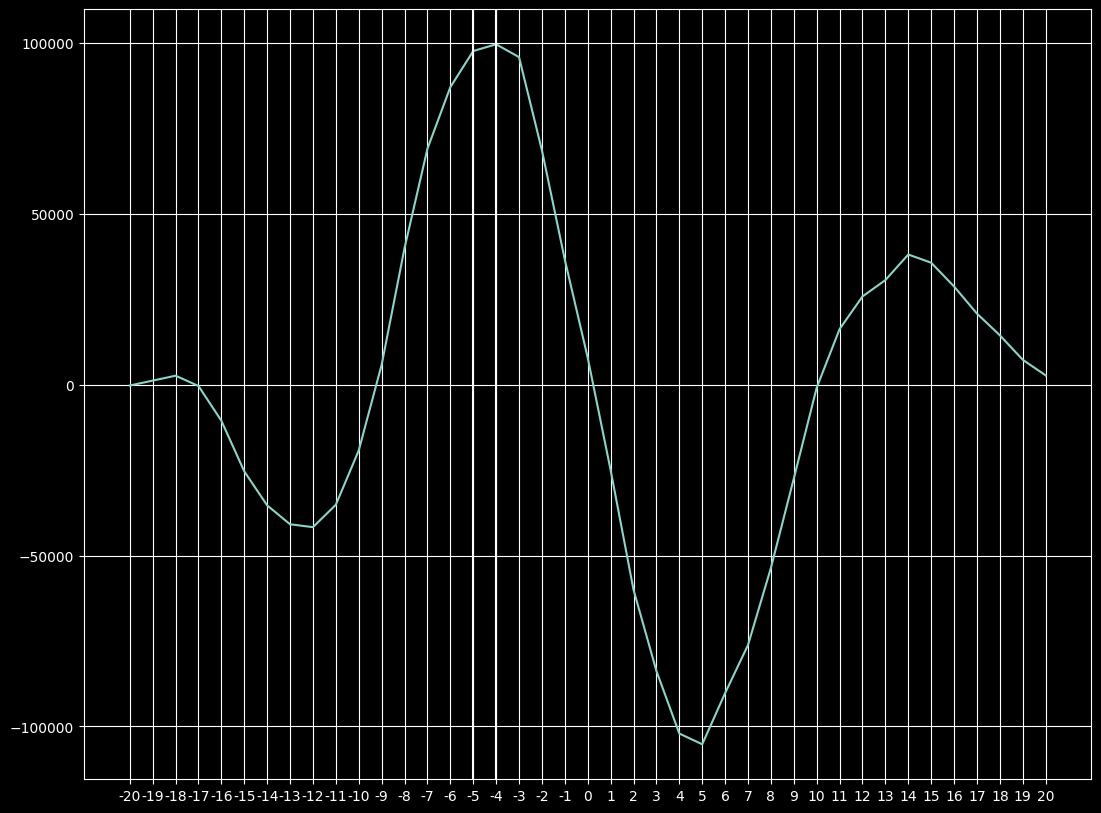

In [332]:
mid = old_mid
mid = mid
# jupiter.print_header()
PX_WIDTH = jupiter.header['YPIXSZ']*1e-6 
FOCAL = jupiter.header['FOCALLEN']*1e-3 
ANG_DIAM = 44.29871 / 3600 * np.pi /180
px_rad = np.round(ANG_DIAM*FOCAL / PX_WIDTH /2).astype(int)
px_u = np.round(mid+px_rad).astype(int)
px_d = np.round(mid-px_rad).astype(int)
plt.figure(figsize=(13,10))
for i in range(0,data.shape[1],20):
    plt.plot(data[:,i])
plt.plot(np.mean(data,axis=1))
plt.axvline(px_u,0,1)
plt.axvline(mid,0,1)
plt.axvline(px_d,0,1)
print(px_rad)
plt.figure(figsize=(13,10))
plt.imshow(data)
plt.axhline(mid,0,1)
plt.axhline(px_u,0,1)
plt.axhline(px_d,0,1)
# plt.xlim(1190,1210)

sel_ends = (1184,1205)
sp_u = data[px_u,slice(*sel_ends)]
sp_d = data[px_d,slice(*sel_ends)]

plt.figure(figsize=(13,10))
plt.plot(sp_u.max()-sp_u,color='b')
plt.plot(sp_d.max()-sp_d,color='orange')
plt.axhline(sp_u.max()-data[px_u].mean(),0,1,color='b',linestyle='dashed')
plt.axhline(sp_d.max()-data[px_d].mean(),0,1,color='orange',linestyle='dashed')
plt.xticks(np.arange(len(sp_u)),np.arange(len(sp_u)))
plt.figure(figsize=(13,10))
plt.plot(sp_u,color='b')
plt.plot(sp_d,color='orange')
plt.axhline(sp_u.mean(),0,1,color='b',linestyle='dashed')
plt.axhline(sp_d.mean(),0,1,color='orange',linestyle='dashed')
sp_u = sp_u - sp_u.mean()
sp_d = sp_d - sp_d.mean()
plt.figure(figsize=(13,10))
plt.plot(sp_u,color='b')
plt.plot(sp_d,color='orange')

corr2 = correlate(sp_u,sp_d,mode='full')
lags2 = correlation_lags(len(sp_u),len(sp_d),mode='full')

new_shift = 15#lags2[corr2.argmax()] 
print(new_shift)
print(lags2[corr2.argmax()-1])
plt.figure(figsize=(13,10))
plt.plot(lags2,corr2)
plt.xticks(lags2,lags2)
plt.axvline(lags2[corr2.argmax()],0,1)
plt.axvline(lags2[corr2.argmax()-1],0,1)
plt.grid()
plt.show()

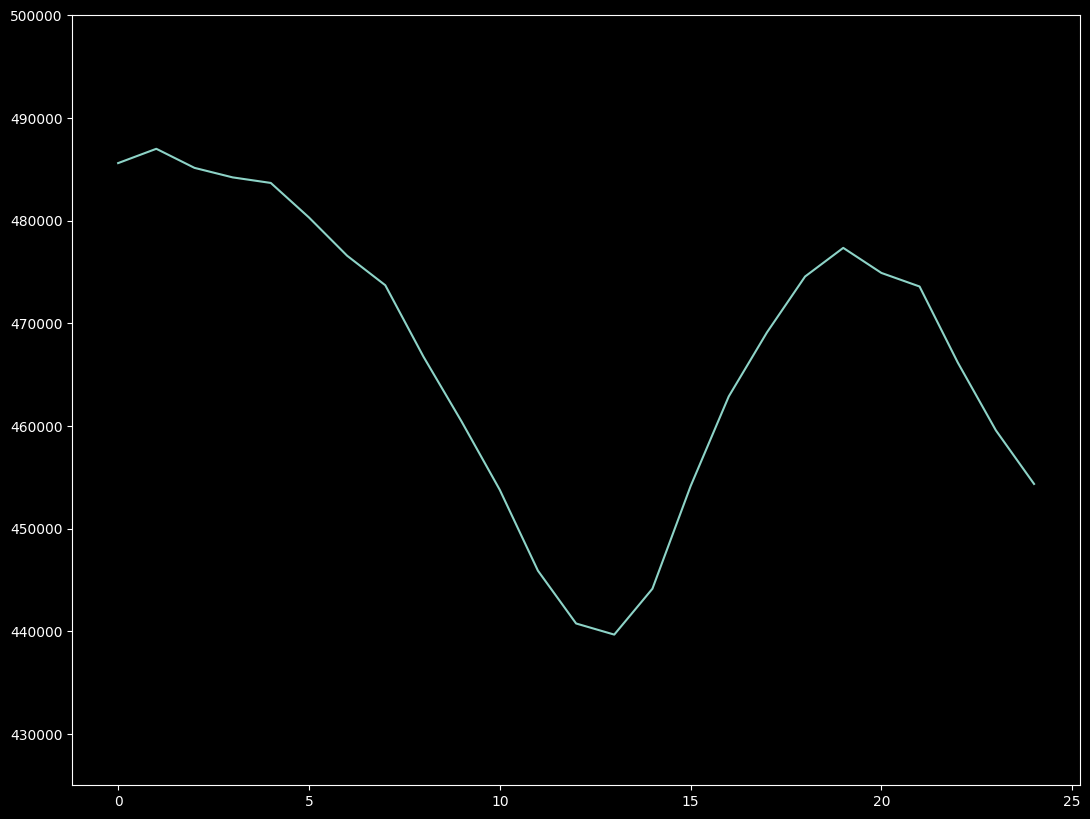

6592.052161891468 0.6159320158026015
DELTA 1.1978574228506522 0.0060520832655795885
VEL 13618.999528172073 m / s
PER 9.161985696927772 h
VEL 27237.999056344146 m / s
PER 4.580992848463886 h


In [217]:
mask_data = data[:,slice(*sel_ends)]
# plt.figure(figsize=(13,10))
# plt.plot(np.sum(data,axis=0))
# plt.xlim(800,830)
plt.figure(figsize=(13,10))
plt.plot(np.sum(mask_data,axis=0))
plt.ylim(4.25e5,5e5)
plt.show()

(mf, qf), (Dmf, Dqf) = fit.results()
# bal_px = np.argmin(np.sum(data,axis=0))+jupiter.lims[2]
# est_bal = mf*bal_px+qf
# Dest_bal = np.sqrt((Dmf*bal_px)**2 + Dqf**2 + 2*fit.res['cov'][0,1])
# print(mf,qf)
# print(est_bal,BALMER)
# print(est_bal-BALMER,Dest_bal)

cen_val = np.argmin(np.sum(mask_data,axis=0)) + jupiter.lims[2] + sel_ends[0]
est_val = fit.method(cen_val) 
Dest_val = np.sqrt((Dmf*cen_val)**2 + Dqf**2 + 2*fit.res['cov'][0,1])
print(est_val,Dest_val)

delta = abs(new_shift*mf)
Ddelta = abs(new_shift*Dmf)

print('DELTA',delta,Ddelta)
print('VEL',C*delta/est_val/4)
print('PER', (8*np.pi * (R/C) * (est_val/delta)).to(u.h) )
print('VEL',C*delta/est_val/2)
print('PER', (4*np.pi * (R/C) * (est_val/delta)).to(u.h) )


6545.016293754199
4
3657.832718436813 m / s
34.11229776983966 h
0.17430179437783622 h
17.05614888491983 h


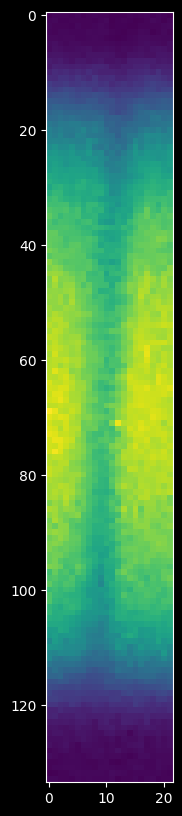

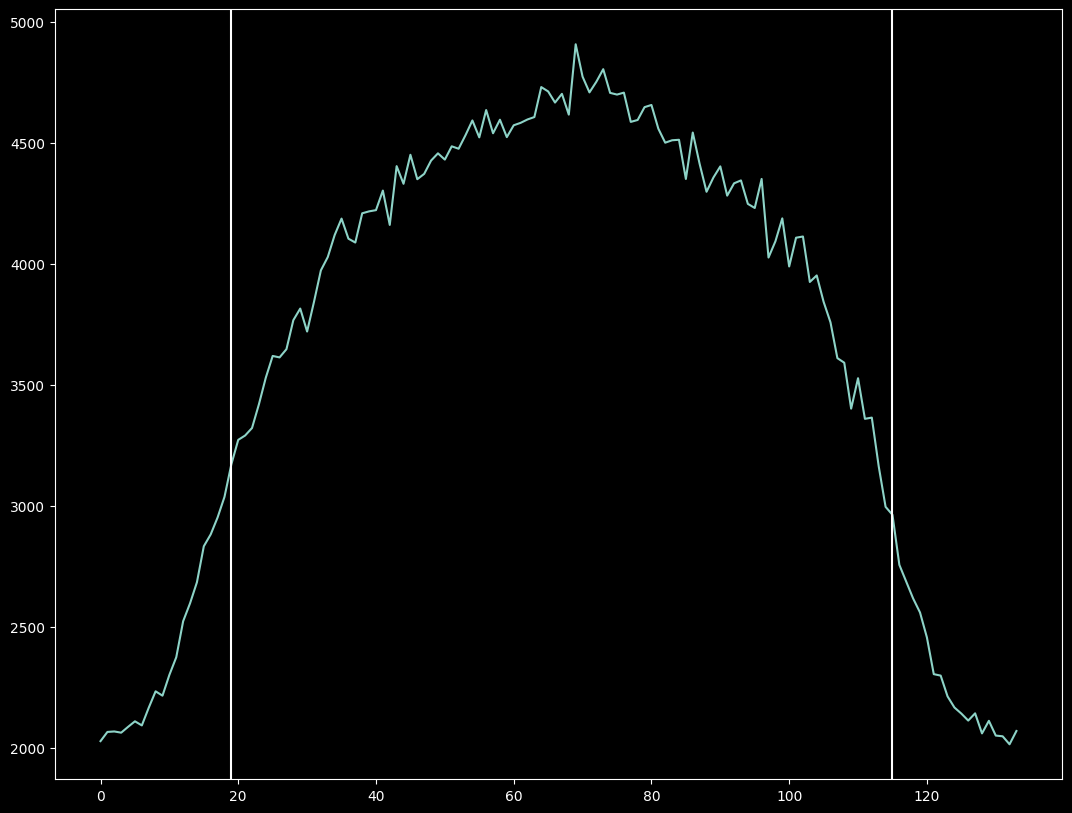

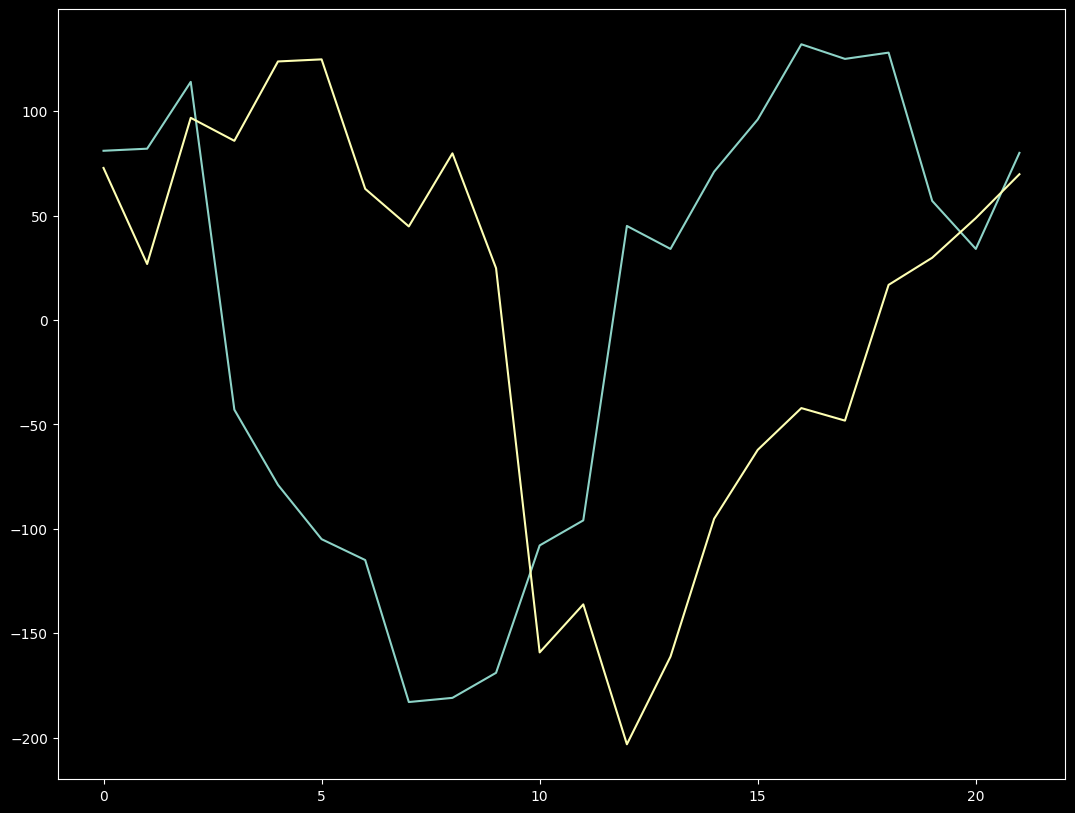

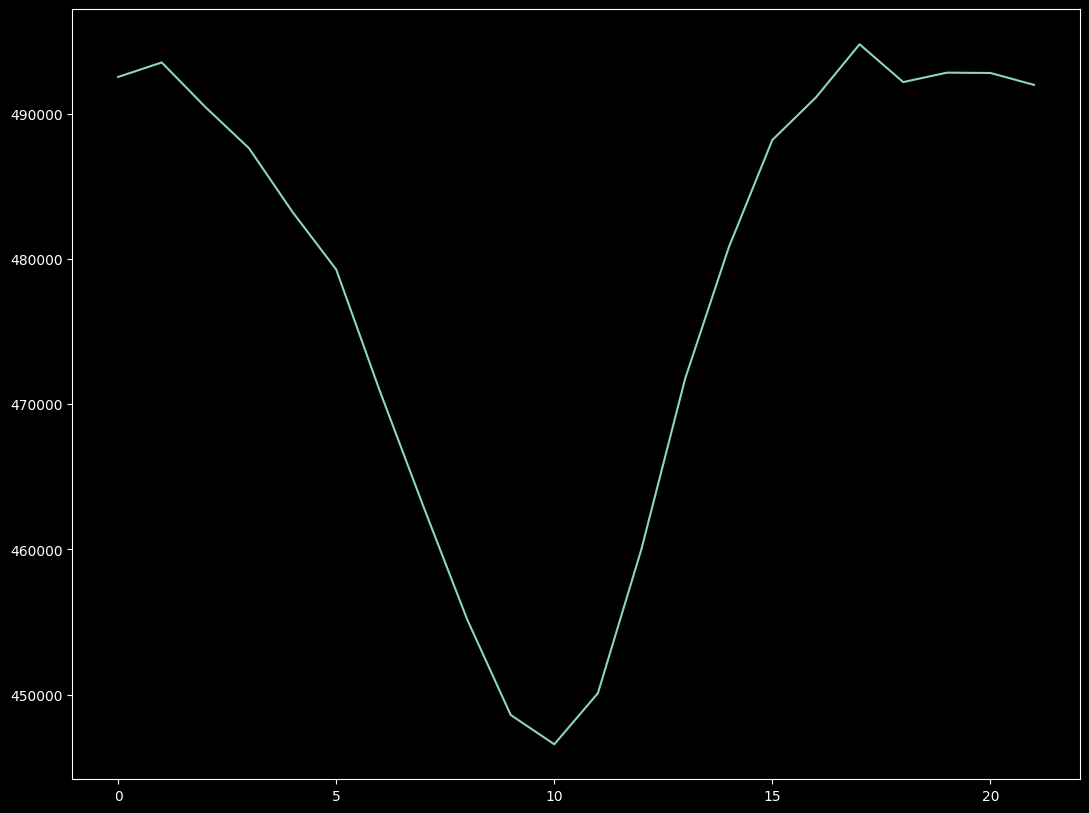

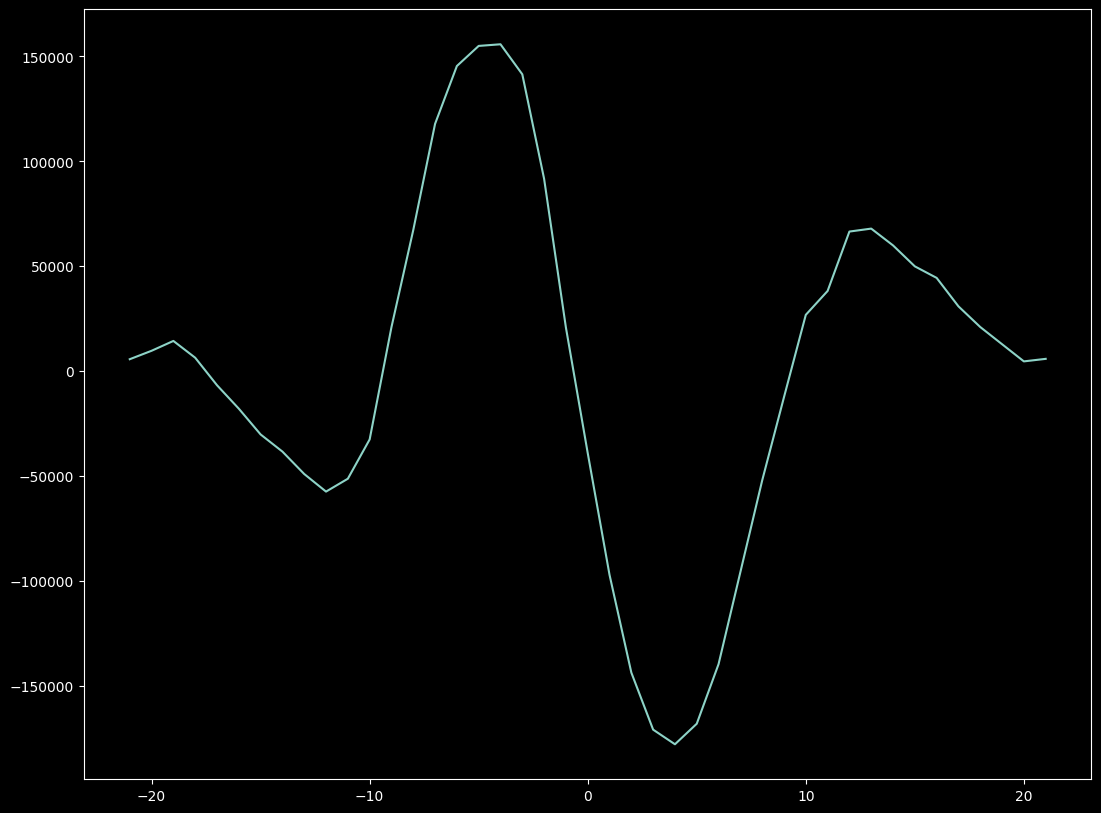

In [252]:
# sel_ends2 = (595,622)
sel_ends2 = (598,620)
m_data = data[:,slice(*sel_ends2)].copy()
plt.figure(figsize=(13,10))
plt.imshow(m_data)
plt.figure(figsize=(13,10))
plt.plot(m_data[:,0])
plt.axvline(px_u,0,1)
plt.axvline(px_d,0,1)

sp2_u = m_data[px_u] - m_data[px_u].mean()
sp2_d = m_data[px_d] - m_data[px_d].mean()
plt.figure(figsize=(13,10))
plt.plot(sp2_u)
plt.plot(sp2_d)

plt.figure(figsize=(13,10))
plt.plot(np.sum(m_data,axis=0))

minpos = np.argmin(np.sum(m_data,axis=0)) + sel_ends2[0] + jupiter.lims[2]
minval = fit.method(minpos)
print(minval)
corr3 = correlate(sp2_u,sp2_d,mode='full')
lags3 = correlation_lags(len(sp2_u),len(sp2_d),mode='full')
shift3 = abs(lags3[corr3.argmax()])
# (m*sh +q) / m*sh
# 1+(q/m*sh)
# Dq/q + Dm/m
T3 = (8*np.pi*R/C * minval/(shift3*mf)).to(u.h)
DT3 = T3 * (Dmf/mf+Dqf/qf)
print(shift3)
print(C*(shift3*mf)/minval/4)
print((8*np.pi*R/C * minval/(shift3*mf)).to(u.h))
print(DT3)
print((4*np.pi*R/C * minval/(shift3*mf)).to(u.h))

plt.figure(figsize=(13,10))
plt.plot(lags3,corr3)
plt.show()


- - -
Value for (598, 620)
2 18
16
6545.016293754199
14631.330873747253 m / s
8.528074442459914 h 0.042345012920705326 h 0.496536623905114
9.92491972222222 h
-1.3968452797623065 h
-32.98724415028564

- - -
Value for (676, 705)
8 23
15
6551.5645809991165
13703.1626831334 m / s
9.105713897504922 h 0.04516801378208568 h 0.4960403356672811
9.92491972222222 h
-0.8192058247172991 h
-18.13685739358786

- - -
Value for (886, 910)
4 15
11
6567.935299111408
10023.938656855622 m / s
12.447909265510164 h 0.061592746066480464 h 0.49480394460407523
9.92491972222222 h
2.5229895432879434 h
40.96244613878298

- - -
Value for (1184, 1205)
6 19
13
6592.052161891468
11803.132924415797 m / s
10.571521957993584 h 0.05211693897932962 h 0.4929937163865204
9.92491972222222 h
0.646602235771363 h
12.406757734329243


= = =

10.163304890867146 0.874573022068976 8.605203046253948
OK


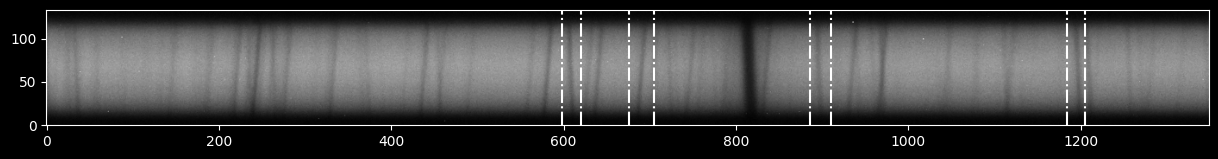

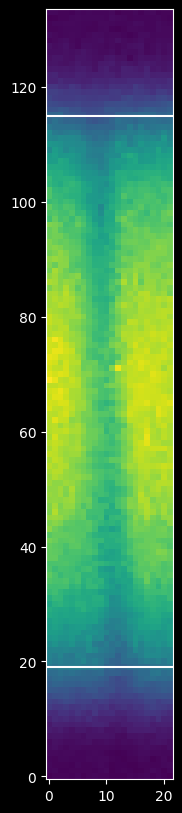

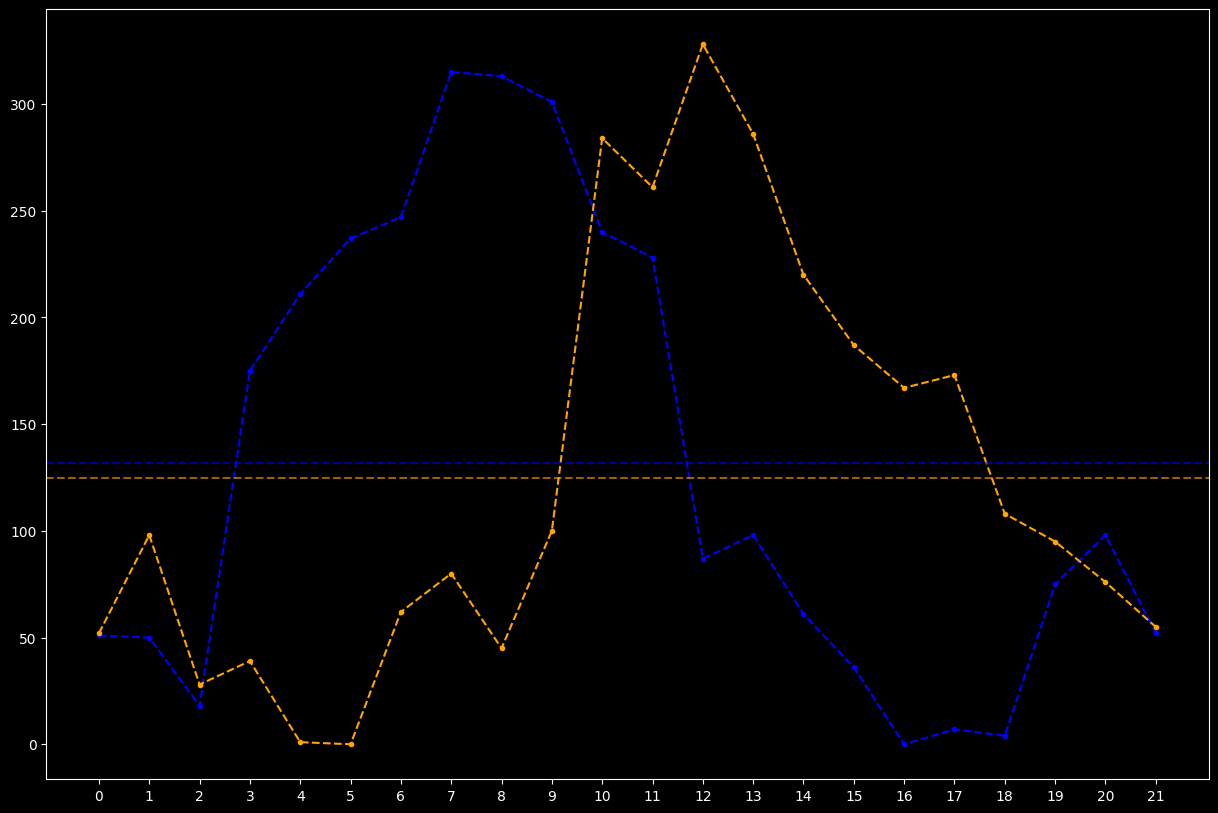

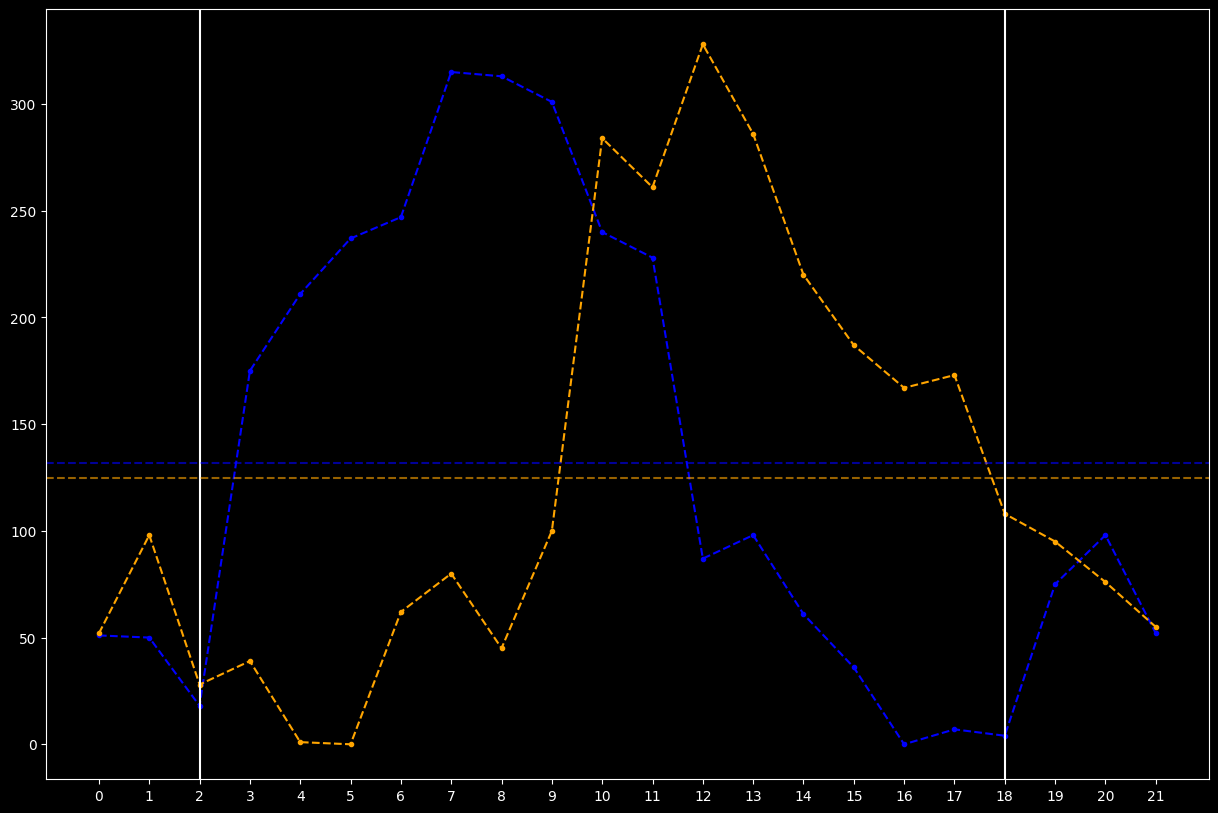

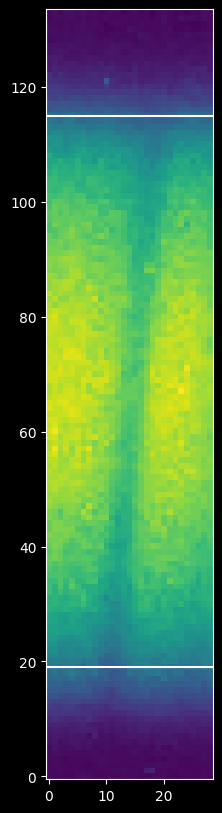

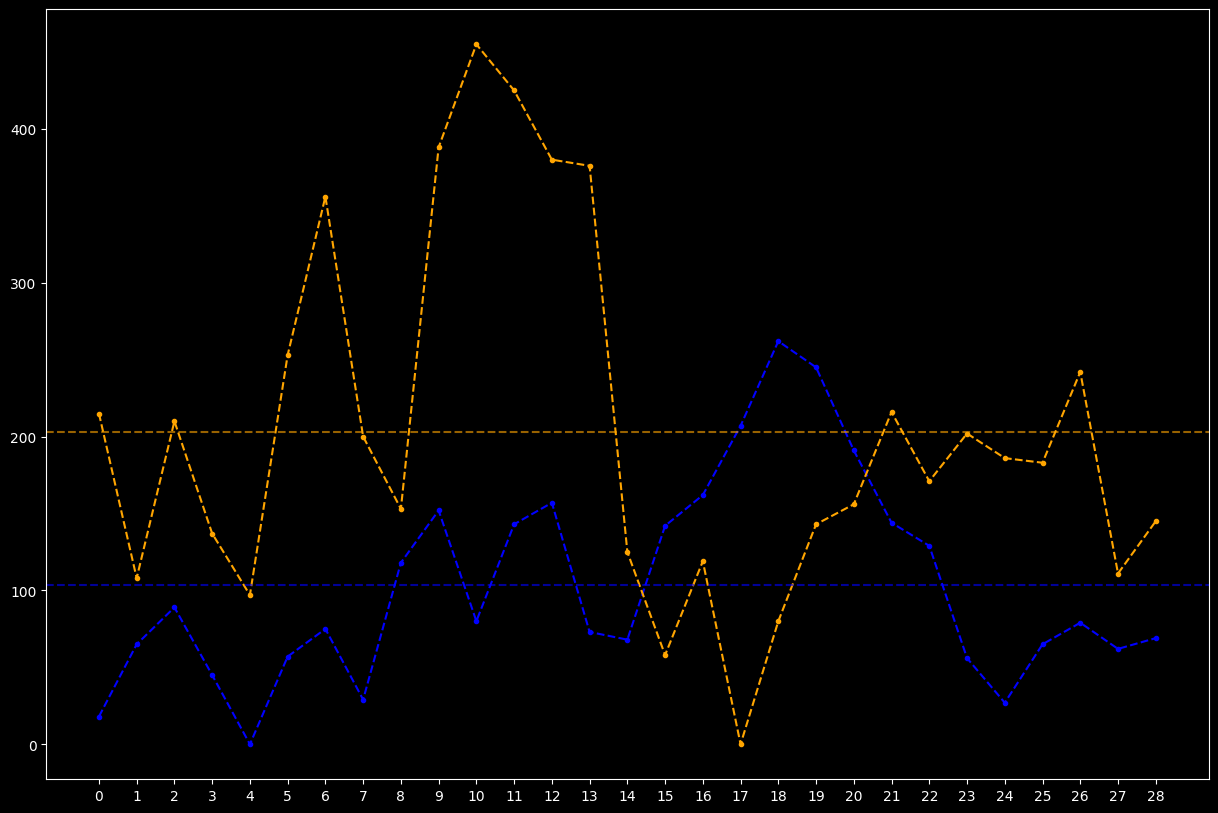

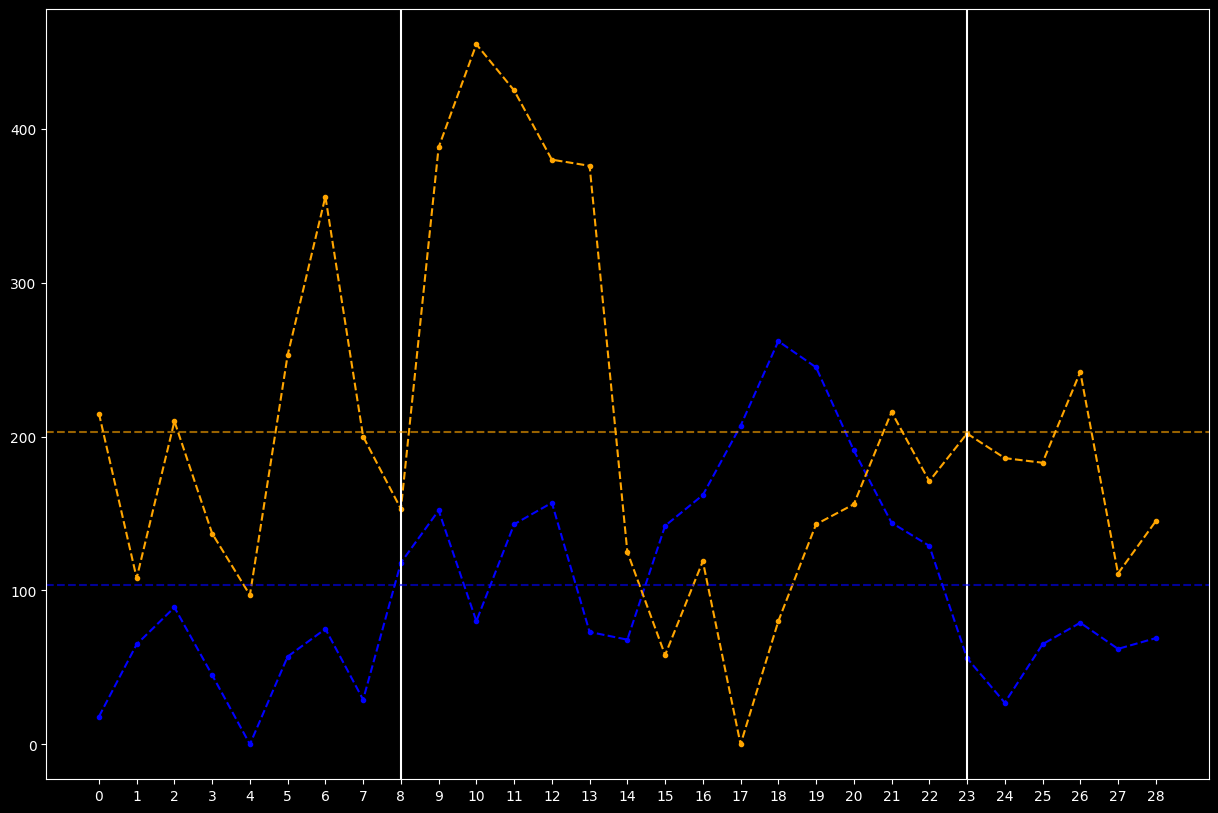

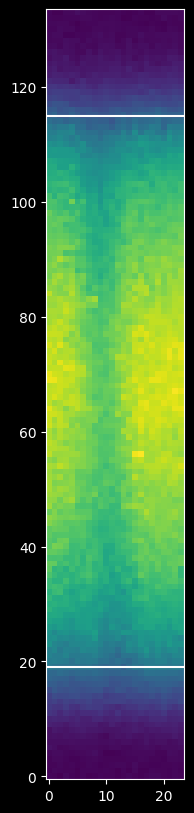

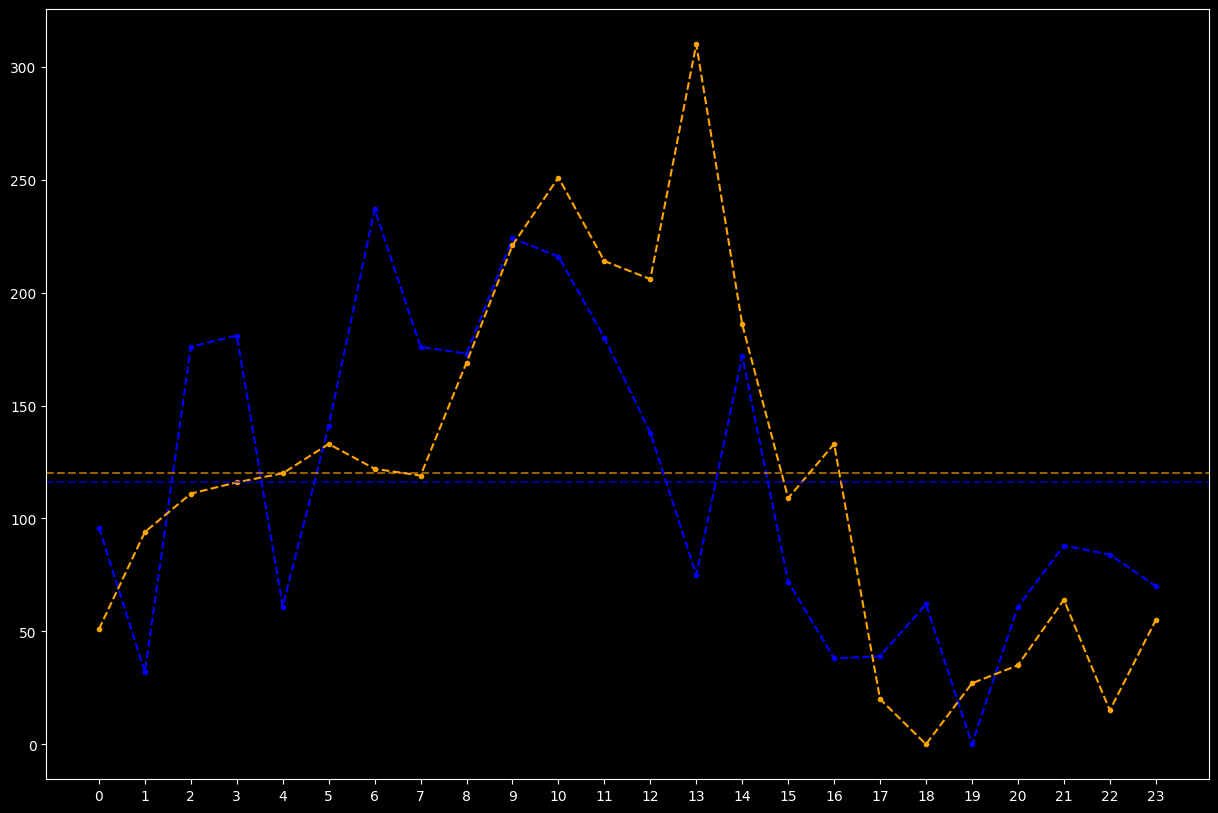

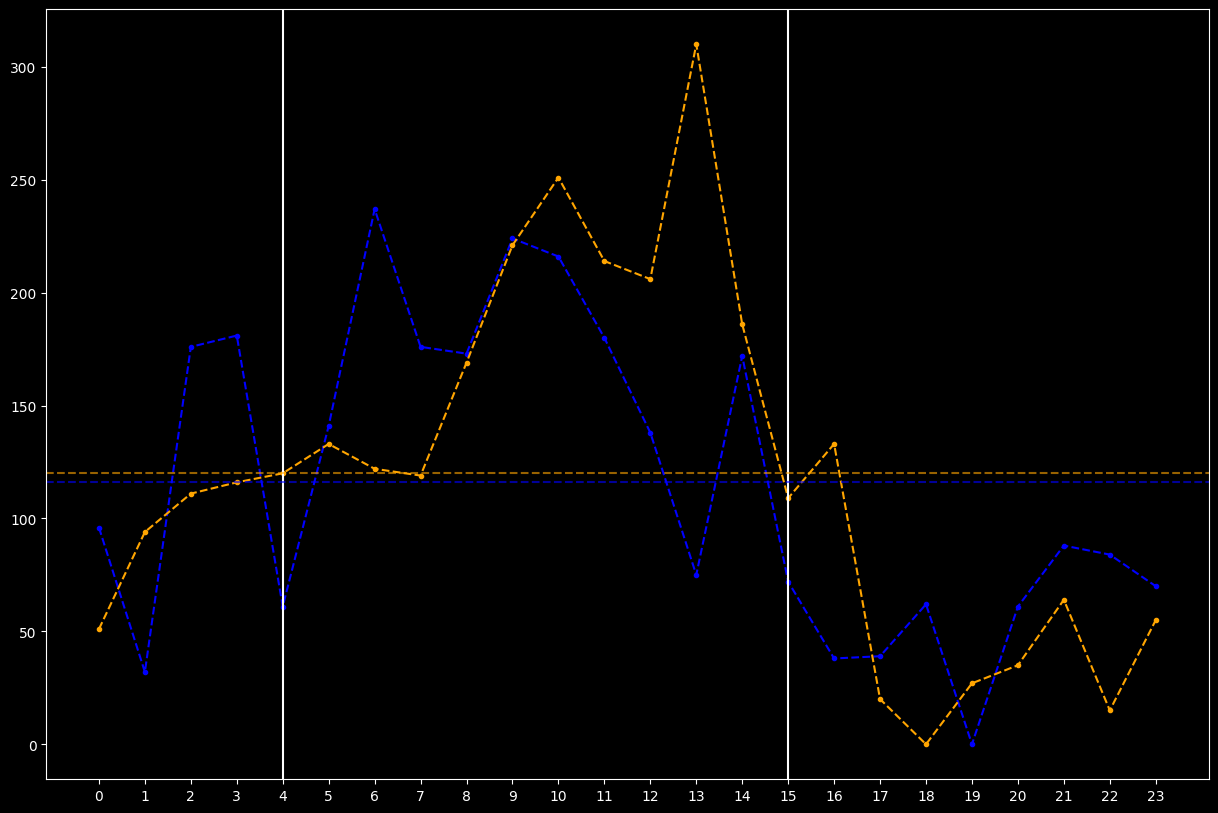

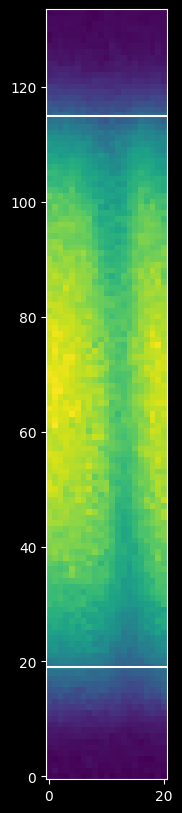

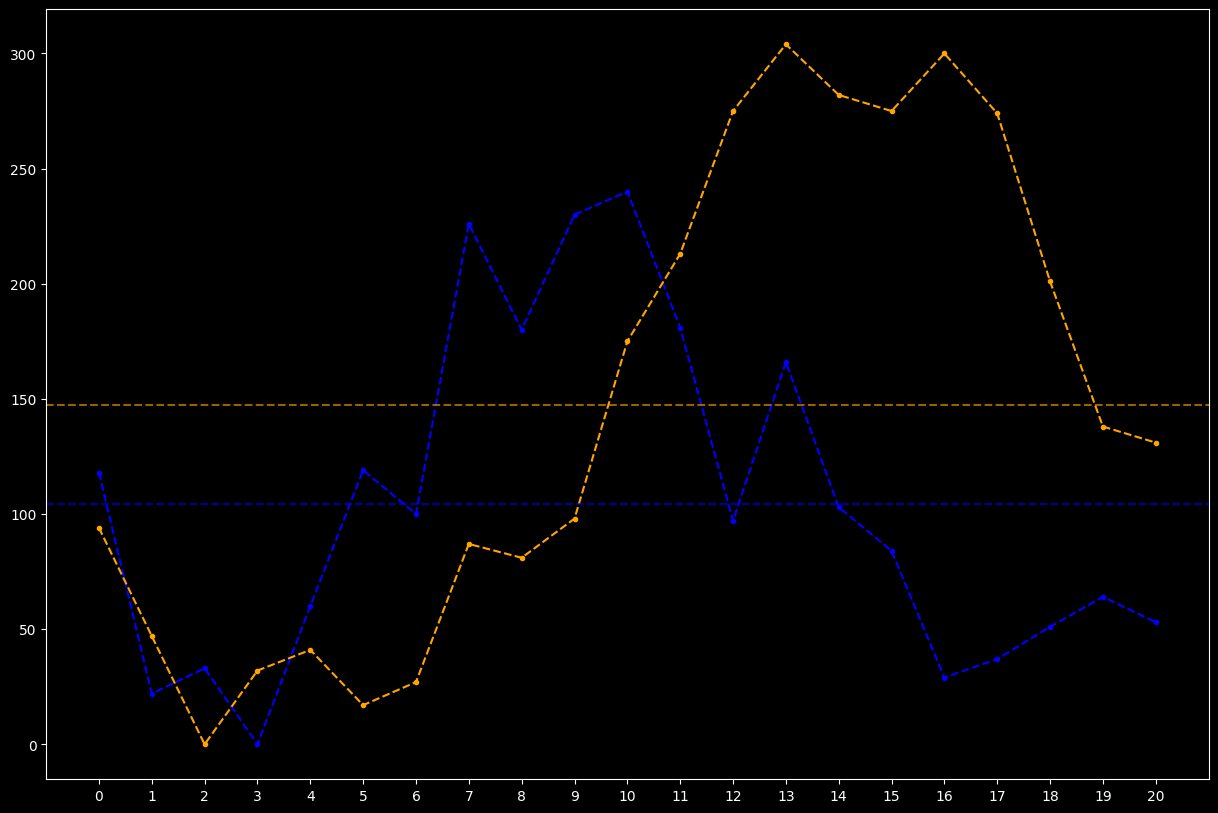

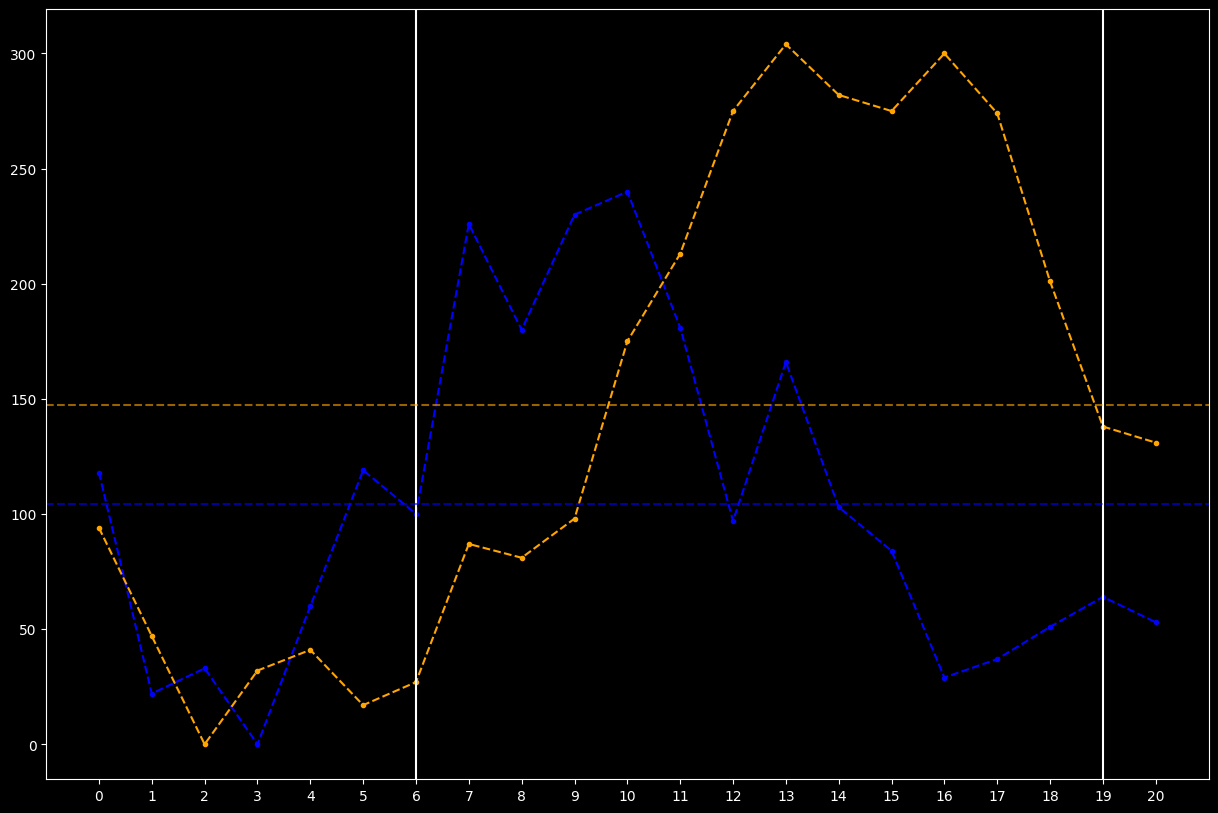

In [341]:
def find_minimum(values, avg: float, dir: str):
    pos = values.argmax()
    step = -1 if dir == 'left' else +1
    while values[pos] > avg:
        pos += step
        if pos == 0 or pos == len(values):
            break
    return pos



cut_list = [(598,620),(676,705),(886,910),(1184,1205)]
# sel_cut = (885,910)
plt.figure(figsize=(15,10))
plt.imshow(data,origin='lower',cmap='gray')
for sel_cut in cut_list: 
    plt.axvline(sel_cut[0],0,1,color='w',linestyle='dashdot')
    plt.axvline(sel_cut[1],0,1,color='w',linestyle='dashdot')

est_ps = []

for sel_cut in cut_list: 
    print('\n- - -\nValue for',sel_cut)
    sh = 0
    p1 = data[px_u+sh,slice(*sel_cut)]
    p2 = data[px_d-sh,slice(*sel_cut)]
    p1 = p1.max()-p1    
    p2 = p2.max()-p2    
    x1 = np.arange(len(p1))    
    x2 = np.arange(len(p2))    
    mp1 = p1.mean()
    mp2 = p2.mean()

    plt.figure(figsize=(15,10))
    plt.imshow(data[:,slice(*sel_cut)],origin='lower')
    plt.axhline(px_u+sh,0,1)
    plt.axhline(px_d-sh,0,1)

    plt.figure(figsize=(15,10))
    plt.plot(x1,p1,'.--',color='b')
    plt.plot(x2,p2,'.--',color='orange')
    plt.axhline(mp1,0,1,linestyle='dashed',color='b',alpha=0.6)
    plt.axhline(mp2,0,1,linestyle='dashed',color='orange',alpha=0.6)
    plt.xticks(x1,x1)

    if p1.argmax() > p2.argmax():
        right = find_minimum(p1,mp1,'right')
        left  = find_minimum(p2,mp2,'left')
    elif p1.argmax() < p2.argmax():
        right = find_minimum(p2,mp2,'right')
        left  = find_minimum(p1,mp1,'left')
    else:
        break

    print(left,right)
    print(right-left)
    shift3 = abs(right-left)
    plt.figure(figsize=(15,10))
    plt.plot(x1,p1,'.--',color='b')
    plt.plot(x2,p2,'.--',color='orange')
    plt.axvline(left,0,1)
    plt.axvline(right,0,1)
    plt.axhline(mp1,0,1,linestyle='dashed',color='b',alpha=0.6)
    plt.axhline(mp2,0,1,linestyle='dashed',color='orange',alpha=0.6)
    plt.xticks(x1,x1)
    
    minpos = np.argmin(np.sum(data[:,slice(*sel_cut)],axis=0)) + sel_cut[0] + jupiter.lims[2]
    minval = fit.method(minpos)
    print(minval)
    # 8pi R/C (min+q/m)/sh
    # 8pi R/C [ (Dq/m)² + (q*Dm/m²)² + 2 q/m³ Cov] / sh
    # T [ (Dq/q) + (Dm/m) + 2Cov/qm ]
    T3 = (8*np.pi*R/C * minval/(shift3*mf)).to(u.h)
    DT3 = (T3-(8*np.pi*R/C*minpos/shift3).to(u.h)) * np.sqrt((Dmf/mf)**2+(Dqf/qf)**2+2*fit.res['cov'][0,1]/mf/qf)
    # DT3 = (T3-8*np.pi*R/C*minpos/shift3).to(u.h) * np.sqrt((Dmf/mf)**2+(Dqf/qf)**2)
    print(C*(shift3*mf)/minval/4)
    print(T3,DT3,DT3/T3*100)
    print(PERIOD)
    print((T3-PERIOD))
    print((T3-PERIOD)/DT3)
    est_ps += [T3.value]
est_ps, std_ps = spc.mean_n_std(est_ps)
print('\n\n= = =\n')
print(est_ps,std_ps,std_ps/est_ps*100)
if (est_ps-std_ps) <= PERIOD.value <= (est_ps+std_ps): 
    print('OK')
else:
    print((est_ps-PERIOD.value)/std_ps*100)
plt.show()